## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import pandas as pd

In [2]:
np.set_printoptions(linewidth=150)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Open and visualise csv

## open and vanilla visualise

In [3]:
PT_drive = '/Users/ash/Library/CloudStorage/OneDrive-Nexus365/PHD/arunan/Martin_google_drive'


In [4]:
df = pd.read_csv(f'{PT_drive}/df_helechos_clean.csv')
df_2020 = pd.read_csv(f'{PT_drive}/df_helechos_with2020.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df_2020['DateTime'] = pd.to_datetime(df_2020['DateTime'], errors='coerce')
df = df.set_index('DateTime').sort_index()
df_2020 = df_2020.set_index('DateTime').sort_index()
df.head()

,Date,Month,Day,hour,Temp,RH%,Gastrotheca chysosticta,Oreobates berdemenos
DateTime,,,,,,,,
2018-09-02 00:00:00,2018-09-02,9,245,0,4.553,100.0,0,0
2018-09-02 01:00:00,2018-09-02,9,245,1,4.051,100.0,0,0
2018-09-02 02:00:00,2018-09-02,9,245,2,4.553,100.0,0,0
2018-09-02 03:00:00,2018-09-02,9,245,3,3.550,100.0,0,0
2018-09-02 04:00:00,2018-09-02,9,245,4,3.048,100.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11303 entries, 2018-09-02 00:00:00 to 2019-12-16 23:00:00
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     11303 non-null  object 
 1   Month                    11303 non-null  int64  
 2   Day                      11303 non-null  int64  
 3   hour                     11303 non-null  int64  
 4   Temp                     11303 non-null  float64
 5   RH%                      11303 non-null  float64
 6   Gastrotheca chysosticta  11303 non-null  int64  
 7   Oreobates berdemenos     11303 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 794.7+ KB


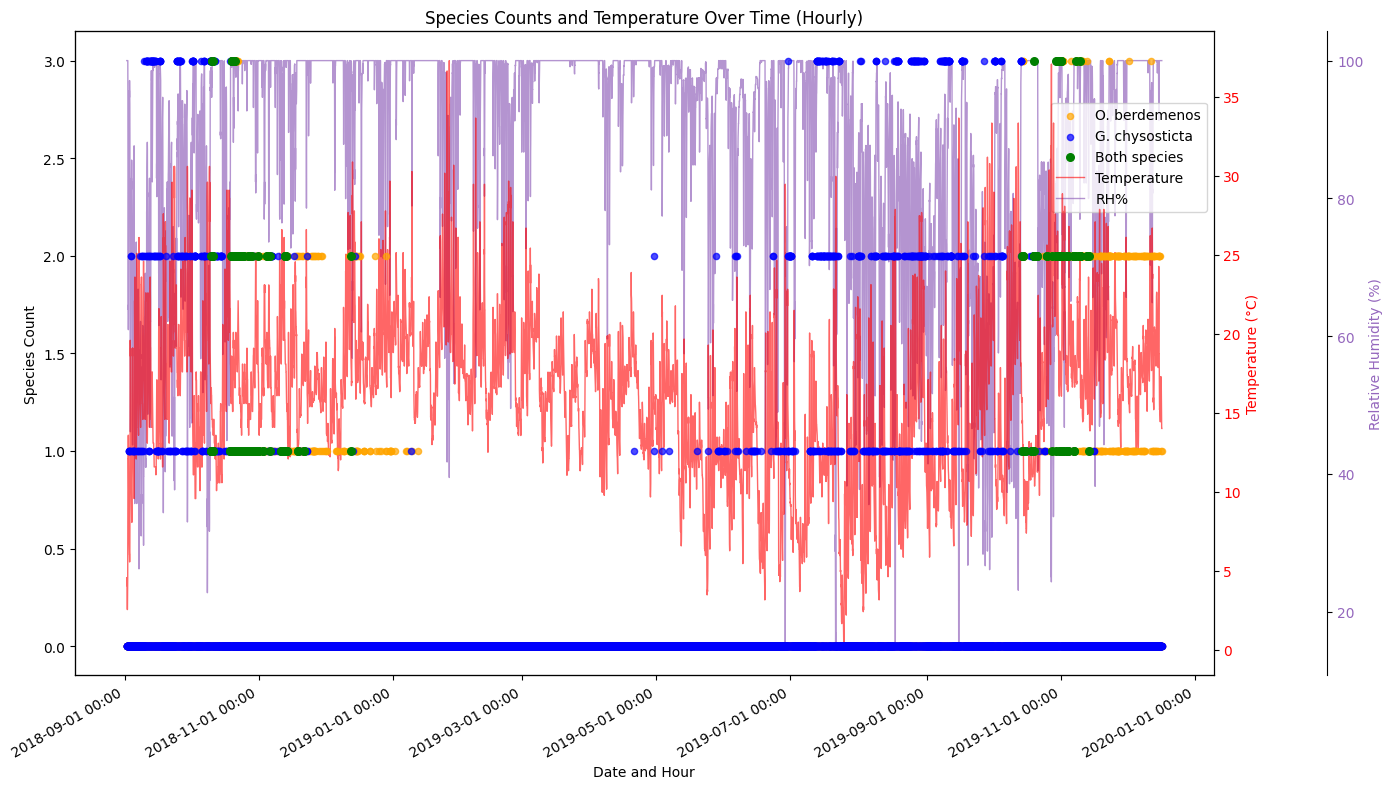

In [6]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 8))

#df.index is the DateTime column after setting it as index, can still be accessed

# Plot species counts on primary y-axis
ax1.scatter(df.index, df['Oreobates berdemenos'], 
            color='orange', label='O. berdemenos', s=20, alpha=0.7, zorder=10)
ax1.scatter(df.index, df['Gastrotheca chysosticta'], 
            color='blue', label='G. chysosticta', s=20, alpha=0.7, zorder=20)

# Find times where both species are present in the same hour
both_species_hourly = df[
    (df['Oreobates berdemenos'] > 0) & 
    (df['Gastrotheca chysosticta'] > 0)
]

# Plot green points for hours where both species are present
if len(both_species_hourly) > 0:
    ax1.scatter(both_species_hourly.index, both_species_hourly['Oreobates berdemenos'], 
                color='green', s=30, label='Both species', zorder=30)
    ax1.scatter(both_species_hourly.index, both_species_hourly['Gastrotheca chysosticta'], 
                color='green', s=30, label='', zorder=40)
    
ax1.set_xlabel('Date and Hour')
ax1.set_ylabel('Species Count', color='k')
ax1.tick_params(axis='y', labelcolor='k')

# Create secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(df.index, df['Temp'], 'r-', linewidth=1, alpha=0.6, label='Temperature', zorder=5)
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
# Third axis for RH%
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.10))
ax3.set_ylabel('Relative Humidity (%)', color='tab:purple')
ax3.tick_params(axis='y', labelcolor='tab:purple')
ax3.plot(df.index,
         df['RH%'],
         color='tab:purple', linestyle='-', linewidth=1, alpha=0.7, label='RH%',zorder=3)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines1 + lines2 +lines3, labels1 + labels2+labels3, loc='upper right',bbox_to_anchor = (1,0.9))

# Desired top-to-bottom order (edit this list: first = top/front)
axes_order = ['ax1', 'ax2', 'ax3']  # e.g. ['ax3','ax1','ax2'] to put ax3 on top

def _reorder_axes(event=None):
    ax_map = {'ax1': ax1, 'ax2': ax2, 'ax3': ax3}
    # Make all axis patches transparent so lower axes are visible
    for ax in ax_map.values():
        ax.set_facecolor('none')
        ax.patch.set_alpha(0)
    # Assign zorders: higher = on top
    # Enumerate from bottom to top so last in list gets highest zorder
    for z, name in enumerate(reversed(axes_order), start=1):
        ax_map[name].set_zorder(z)

# Defer reordering until after ax2/ax3 are created later in the cell
fig.canvas.mpl_connect('draw_event', _reorder_axes)

# Limit to a shorter time window for better visualization with hourly data
# start_time = '2019-11-01 00:00:00'
# end_time = '2019-11-20 23:59:59'
# ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))


# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.title('Species Counts and Temperature Over Time (Hourly)')
plt.tight_layout()
plt.show()

## Hour of Day

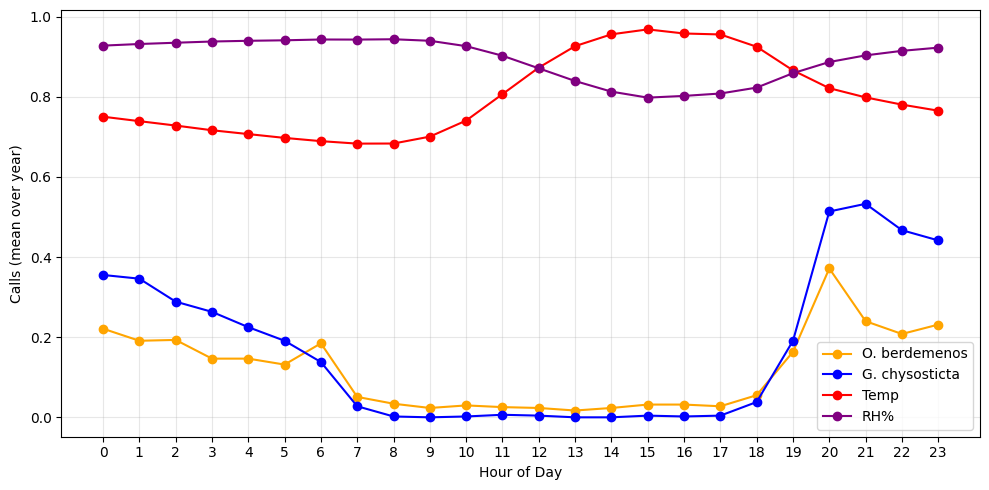

In [7]:
# Sum calls over the whole dataset by hour-of-day and plot
species_cols = ['Temp', 'RH%','Oreobates berdemenos', 'Gastrotheca chysosticta']

# Ensure hour column exists (it does in df); otherwise could derive from index
hourly_sum = (
    df.groupby('hour')[species_cols]
      .mean()
      .reindex(range(24), fill_value=0)  # guarantee all 24 hours present
)

hourly_sum['RH%'] = hourly_sum['RH%'] / 100  # Scale RH% for better visualization
hourly_sum['Temp'] = hourly_sum['Temp'] / 20  # Scale Temp for better visualization

fig_hour, ax_hour = plt.subplots(figsize=(10,5))
ax_hour.plot(hourly_sum.index, hourly_sum['Oreobates berdemenos'],
             marker='o', label='O. berdemenos', color='orange')
ax_hour.plot(hourly_sum.index, hourly_sum['Gastrotheca chysosticta'],
             marker='o', label='G. chysosticta', color='blue')
ax_hour.plot(hourly_sum.index, hourly_sum['Temp'],
             marker='o', label='Temp', color='red')
ax_hour.plot(hourly_sum.index, hourly_sum['RH%'],
             marker='o', label='RH%', color='purple')
ax_hour.set_xlabel('Hour of Day')
ax_hour.set_ylabel('Calls (mean over year)')
ax_hour.set_xticks(range(24))
ax_hour.grid(alpha=0.3)
ax_hour.legend()
plt.tight_layout()
plt.show()

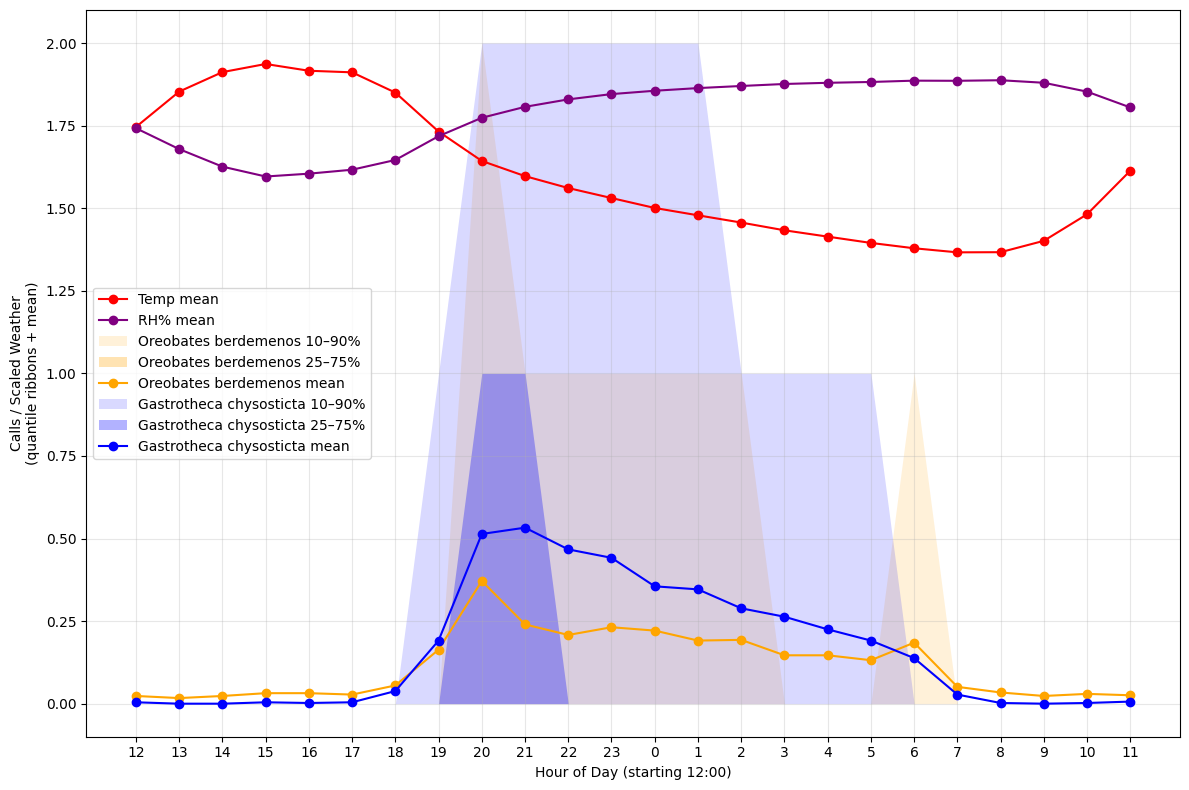

In [8]:
# Hourly mean plus quantile ribbons (e.g. 10–90% and 25–75%)
# Reorder x-axis to start at 08:00 and wrap through 07:00 next day

species_cols = ['Temp', 'RH%','Oreobates berdemenos', 'Gastrotheca chysosticta']
q_list = [0.10, 0.25, 0.75, 0.90]

stats = (
    df.groupby('hour')[species_cols]
      .agg(['mean', 'std'])
      .reindex(range(24))
)
for col in species_cols:
    stats[(col, 'std')] = stats[(col, 'std')].fillna(0)

quant = (
    df.groupby('hour')[species_cols]
      .quantile(q_list)
      .unstack()
      .reindex(range(24))
)

def _scale_series(col, s):
    if col == 'Temp':
        return s / 10.0   # (kept your prior scaling intent)
    if col == 'RH%':
        return s / 50.0
    return s

if 'colors' not in globals():
    colors = {
        'Oreobates berdemenos': 'orange',
        'Gastrotheca chysosticta': 'blue',
        'Temp': 'red',
        'RH%': 'purple'
    }

# Reordered hour sequence: 08,09,...,23,00,01,...,07
hour_order = list(range(12,24)) + list(range(0,12))
x = np.arange(24)  # plotting positions (categorical sequence)

fig_hour_var, ax_hour_var = plt.subplots(figsize=(12, 8))

for col in species_cols:
    m   = stats[(col, 'mean')].reindex(hour_order)
    s   = stats[(col, 'std')].reindex(hour_order)
    q10 = quant[(col, 0.10)].reindex(hour_order)
    q25 = quant[(col, 0.25)].reindex(hour_order)
    q75 = quant[(col, 0.75)].reindex(hour_order)
    q90 = quant[(col, 0.90)].reindex(hour_order)

    m_s   = _scale_series(col, m)
    q10_s = _scale_series(col, q10)
    q25_s = _scale_series(col, q25)
    q75_s = _scale_series(col, q75)
    q90_s = _scale_series(col, q90)

    if col not in ['Temp', 'RH%']:
        ax_hour_var.fill_between(x, q10_s, q90_s,
                                 color=colors[col], alpha=0.15, linewidth=0,
                                 label=f'{col} 10–90%')
        ax_hour_var.fill_between(x, q25_s, q75_s,
                                 color=colors[col], alpha=0.30, linewidth=0,
                                 label=f'{col} 25–75%')

    ax_hour_var.plot(x, m_s, marker='o', color=colors[col],
                     label=f'{col} mean')

ax_hour_var.set_xlabel('Hour of Day (starting 12:00)')
ax_hour_var.set_ylabel('Calls / Scaled Weather\n(quantile ribbons + mean)')
ax_hour_var.set_xticks(x)
ax_hour_var.set_xticklabels(hour_order)
ax_hour_var.grid(alpha=0.3)

handles, labels = ax_hour_var.get_legend_handles_labels()
seen = set()
h_clean, l_clean = [], []
for h_, l_ in zip(handles, labels):
    if l_ not in seen:
        seen.add(l_)
        h_clean.append(h_)
        l_clean.append(l_)
ax_hour_var.legend(h_clean, l_clean, ncol=1)

plt.tight_layout()
plt.show()

hourly_stats = stats
hourly_quantiles = quant


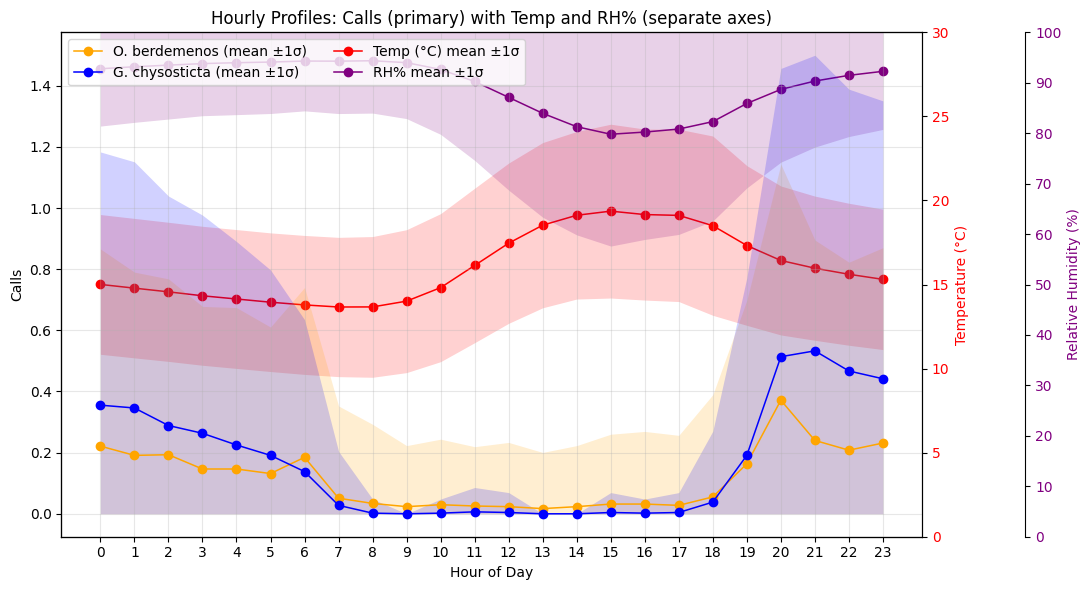

In [9]:
# Hourly mean with ±1 std ribbons
# Temp axis forced to 0–30 °C; RH% axis forced to 0–100 %.

mean_temp = hourly_stats[('Temp','mean')]
std_temp  = hourly_stats[('Temp','std')]

mean_rh = hourly_stats[('RH%','mean')]
std_rh  = hourly_stats[('RH%','std')]

mean_o = hourly_stats[('Oreobates berdemenos','mean')]
std_o  = hourly_stats[('Oreobates berdemenos','std')]

mean_g = hourly_stats[('Gastrotheca chysosticta','mean')]
std_g  = hourly_stats[('Gastrotheca chysosticta','std')]

hours = hourly_stats.index

if 'colors' not in globals():
    colors = {
        'Oreobates berdemenos': 'orange',
        'Gastrotheca chysosticta': 'blue',
        'Temp': 'red',
        'RH%': 'purple'
    }

fig_hour_std, ax_calls = plt.subplots(figsize=(11,6))

def ribbon(ax, x, m, s, label, color, floor_zero=False, **plot_kw):
    lower = m - s
    upper = m + s
    if floor_zero:
        lower = lower.clip(lower=0)
    ax.fill_between(x, lower, upper, color=color, alpha=0.18, linewidth=0)
    line = ax.plot(x, m, marker='o', color=color, label=label, linewidth=1.1, **plot_kw)[0]
    return line

# Primary axis: species counts
l1 = ribbon(ax_calls, hours, mean_o, std_o, 'O. berdemenos (mean ±1σ)', colors['Oreobates berdemenos'], floor_zero=True)
l2 = ribbon(ax_calls, hours, mean_g, std_g, 'G. chysosticta (mean ±1σ)', colors['Gastrotheca chysosticta'], floor_zero=True)

ax_calls.set_xlabel('Hour of Day')
ax_calls.set_ylabel('Calls')
ax_calls.set_xticks(range(24))
ax_calls.grid(alpha=0.3)

# Secondary axis: Temperature (unscaled)
ax_temp = ax_calls.twinx()
l3 = ribbon(ax_temp, hours, mean_temp, std_temp, 'Temp (°C) mean ±1σ', colors['Temp'])
ax_temp.set_ylabel('Temperature (°C)', color=colors['Temp'])
ax_temp.tick_params(axis='y', labelcolor=colors['Temp'])
ax_temp.set_ylim(0, 30)
ax_temp.set_yticks(np.arange(0, 31, 5))

# Tertiary axis: RH%
ax_rh = ax_calls.twinx()
ax_rh.spines['right'].set_position(('axes', 1.12))
l4 = ribbon(ax_rh, hours, mean_rh, std_rh, 'RH% mean ±1σ', colors['RH%'])
ax_rh.set_ylabel('Relative Humidity (%)', color=colors['RH%'])
ax_rh.tick_params(axis='y', labelcolor=colors['RH%'])
ax_rh.set_ylim(0, 100)
ax_rh.set_yticks(np.arange(0, 101, 10))

# Bring call axis to front
ax_calls.set_zorder(10)
ax_calls.patch.set_alpha(0)

# Legend combined
handles = [l1, l2, l3, l4]
labels = [h.get_label() for h in handles]
ax_calls.legend(handles, labels, ncol=2, loc='upper left')

plt.title('Hourly Profiles: Calls (primary) with Temp and RH% (separate axes)')
plt.tight_layout()
plt.show()

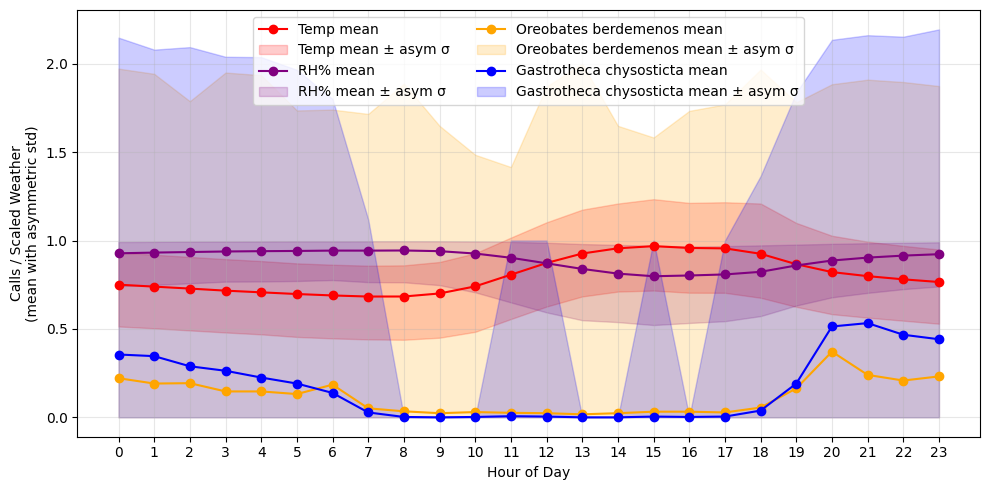

In [10]:
# Asymmetric (one-sided) standard deviations around the mean for each hour

hours = range(24)
grouped = df.groupby('hour')[species_cols]
mean_hour = grouped.mean().reindex(hours)

# Containers for asymmetric std
std_up = pd.DataFrame(index=hours, columns=species_cols, dtype=float)
std_down = pd.DataFrame(index=hours, columns=species_cols, dtype=float)

for h in hours:
    mask_h = df['hour'] == h
    for col in species_cols:
        vals = df.loc[mask_h, col].dropna()
        if len(vals) == 0:
            std_up.loc[h, col] = 0.0
            std_down.loc[h, col] = 0.0
            continue
        m = mean_hour.loc[h, col]
        above = vals[vals >= m]
        below = vals[vals <= m]
        # One–sided std (population style). If only one value, set 0.
        std_up.loc[h, col] = np.sqrt(((above - m) ** 2).mean()) if len(above) > 1 else 0.0
        std_down.loc[h, col] = np.sqrt(((below - m) ** 2).mean()) if len(below) > 1 else 0.0

# Scale weather (match earlier plots)
mean_plot = mean_hour.copy()
up_plot = std_up.copy()
down_plot = std_down.copy()

if 'Temp' in species_cols:
    mean_plot['Temp'] /= 20.0
    up_plot['Temp']   /= 20.0
    down_plot['Temp'] /= 20.0
if 'RH%' in species_cols:
    mean_plot['RH%']  /= 100.0
    up_plot['RH%']    /= 100.0
    down_plot['RH%']  /= 100.0

colors = {
    'Oreobates berdemenos': 'orange',
    'Gastrotheca chysosticta': 'blue',
    'Temp': 'red',
    'RH%': 'purple'
}

fig_asym, ax_asym = plt.subplots(figsize=(10,5))
for col in species_cols:
    m = mean_plot[col]
    upper = m + up_plot[col]
    lower = m - down_plot[col]
    ax_asym.plot(hours, m, marker='o', label=f'{col} mean', color=colors.get(col, None))
    ax_asym.fill_between(hours, lower, upper,
                         color=colors.get(col, None),
                         alpha=0.20,
                         label=f'{col} mean ± asym σ')

ax_asym.set_xlabel('Hour of Day')
ax_asym.set_ylabel('Calls / Scaled Weather\n(mean with asymmetric std)')
ax_asym.set_xticks(range(24))
ax_asym.grid(alpha=0.3)
# Deduplicate legend entries
handles, labels = ax_asym.get_legend_handles_labels()
seen = {}
h_clean, l_clean = [], []
for h, l in zip(handles, labels):
    if l not in seen:
        seen[l] = True
        h_clean.append(h)
        l_clean.append(l)
ax_asym.legend(h_clean, l_clean, ncol=2)
plt.tight_layout()
plt.show()

# Store for later use
hourly_asym_stats = {
    'mean': mean_hour,
    'std_up': std_up,
    'std_down': std_down
}

## Day of year

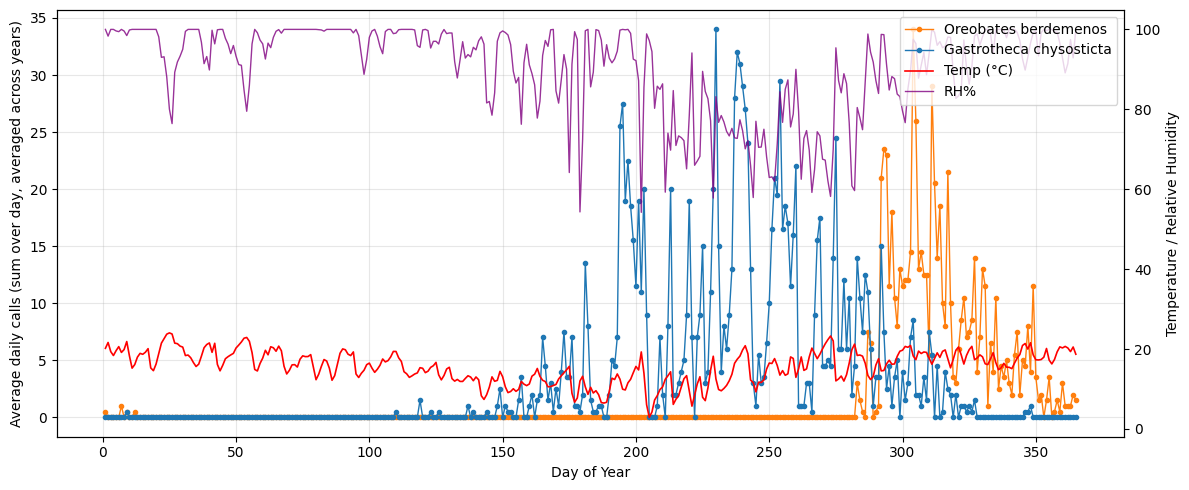

In [40]:
# Average (multi-year) daily call profile over a year (day-of-year) for both species using df_2020
species = ['Oreobates berdemenos', 'Gastrotheca chysosticta']

# 1. Daily totals (sum over 24 hours) for calls
daily_calls = df_2020[species].resample('D').sum()

# 2. Daily weather means (ignore missing RH% automatically)
daily_weather = df_2020.resample('D').agg({'Temp': 'mean', 'RH%': 'mean'})

# 3. Add day-of-year
doy_calls = daily_calls.index.dayofyear
doy_weather = daily_weather.index.dayofyear
daily_calls = daily_calls.assign(doy=doy_calls)
daily_weather = daily_weather.assign(doy=doy_weather)

# 4. Average across years for each day-of-year
doy_mean = (daily_calls
            .groupby('doy')[species]
            .mean()
            .reindex(range(1, 366))) 

doy_weather_mean = (daily_weather
                    .groupby('doy')[['Temp', 'RH%']]
                    .mean()
                    .reindex(range(1, 367)))

# Handle missing RH% (some later period lacks RH). Interpolate to avoid breaks if desired.
# rh_raw_missing = doy_weather_mean['RH%'].isna().sum()
# doy_weather_mean['RH%_interp'] = doy_weather_mean['RH%'].interpolate(limit_direction='both')

# 5. Plot
fig_doy, ax_doy = plt.subplots(figsize=(12,5))
for col, color in zip(species, ['tab:orange','tab:blue']):
    ax_doy.plot(doy_mean.index, doy_mean[col], marker='o', ms=3, linewidth=1, label=col, color=color)

ax_doy.set_xlabel('Day of Year')
ax_doy.set_ylabel('Average daily calls (sum over day, averaged across years)')
ax_doy.grid(alpha=0.3)

# Secondary axis for weather
ax_env = ax_doy.twinx()
ax_env.plot(doy_weather_mean.index, doy_weather_mean['Temp'], color='red', linewidth=1.2, label='Temp (°C)')
# Plot interpolated RH% (solid) and optionally indicate missing original values with markers
ax_env.plot(doy_weather_mean.index, doy_weather_mean['RH%'], color='purple', linewidth=1.0, alpha=0.8, label='RH%')

# if rh_raw_missing > 0:
#     # Mark original missing RH% positions
#     missing_idx = doy_weather_mean.index[doy_weather_mean['RH%'].isna()]
#     ax_env.scatter(missing_idx, doy_weather_mean.loc[missing_idx, 'RH%_interp'],
#                    color='purple', s=10, alpha=0.6, marker='x', label='RH% missing (filled)')

ax_env.set_ylabel('Temperature / Relative Humidity')

# # Month boundary guides (non-leap reference year)
# month_starts = pd.to_datetime(['2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01',
#                                '2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01',
#                                '2019-11-01','2019-12-01'])
# for dt in month_starts:
#     ax_doy.axvline(dt.dayofyear, color='lightgray', linewidth=0.6, alpha=0.6)

# Combined legend
h1, l1 = ax_doy.get_legend_handles_labels()
h2, l2 = ax_env.get_legend_handles_labels()
seen = {}
handles = []
labels = []
for h, l in list(zip(h1+h2, l1+l2)):
    if l not in seen:
        seen[l] = True
        handles.append(h)
        labels.append(l)
ax_env.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

# Store for later use
doy_average_calls = doy_mean
doy_average_weather = doy_weather_mean[['Temp', 'RH%']]

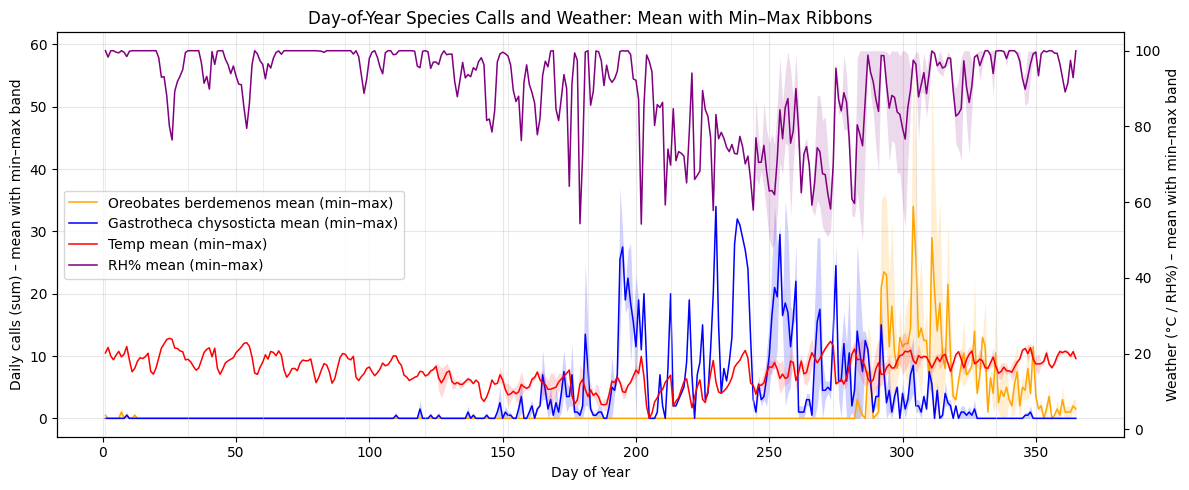

In [41]:
# Day-of-Year plot (as in previous cell) but with min–max ribbons for each series and SMOOTHED!!
smoothing = False #False
# Ensure required objects from previous cells exist: daily_calls, daily_weather, species
# Compute per day-of-year stats (mean / min / max) for calls and weather
doy_calls_stats = (daily_calls
                   .groupby('doy')[species]
                   .agg(['mean', 'min', 'max'])
                   .reindex(range(1, 366)))        

doy_weather_stats = (daily_weather
                     .groupby('doy')[['Temp', 'RH%']]
                     .agg(['mean', 'min', 'max'])
                     .reindex(range(1, 366)))


# Choose smoothing window (days)
smoothing_window = 7  # adjust as needed
if smoothing:
    doy_calls_stats = doy_calls_stats.rolling(smoothing_window, center=True, min_periods=1).mean()
    doy_weather_stats = doy_weather_stats.rolling(smoothing_window, center=True, min_periods=1).mean()

# # Day-of-Year plot (as in previous cell) but with min–max ribbons for each series and SMOOTHED!!
# smoothing = True #False
# # Ensure required objects from previous cells exist: daily_calls, daily_weather, species

# smoothing_window = 7  # days
# if smoothing:
#     print(daily_calls.head())
#     print(daily_calls.tail())
#     #smooth daily calls and weather before computing stats
#     daily_calls_smoothed = daily_calls[species].rolling(smoothing_window, center=True, min_periods=1).sum()
#     print(daily_calls_smoothed.head())
#     daily_weather_smoothed = daily_weather[species].rolling(smoothing_window, center=True, min_periods=1).sum()
#     # Compute per day-of-year stats (mean / min / max) for calls and weather
#     doy_calls_stats = (daily_calls_smoothed
#                        .groupby('doy')[species]
#                        .agg(['mean', 'min', 'max'])
#                        .reindex(range(1, 366)))        
#     print(doy_calls_stats.head())
#     doy_weather_stats = (daily_weather_smoothed
#                          .groupby('doy')[['Temp', 'RH%']]
#                          .agg(['mean', 'min', 'max'])
#                          .reindex(range(1, 366)))
# else:
#     doy_calls_stats = (daily_calls
#                     .groupby('doy')[species]
#                     .agg(['mean', 'min', 'max'])
#                     .reindex(range(1, 366)))        

#     doy_weather_stats = (daily_weather
#                         .groupby('doy')[['Temp', 'RH%']]
#                         .agg(['mean', 'min', 'max'])
#                         .reindex(range(1, 366)))

# Colors (reuse if already defined)
if 'colors' not in globals():
    colors = {
        'Oreobates berdemenos': 'orange',
        'Gastrotheca chysosticta': 'blue',
        'Temp': 'red',
        'RH%': 'purple'
    }

doy_index = doy_calls_stats.index

fig_doy_ribbon, ax_calls_ribbon = plt.subplots(figsize=(12,5))
ax_weather_ribbon = ax_calls_ribbon.twinx()

# Helper to extract series
def stat_series(stats_df, var, stat):
    return stats_df[(var, stat)]

# Plot species (left axis) with ribbons
for sp in species:
    m = stat_series(doy_calls_stats, sp, 'mean')
    mn = stat_series(doy_calls_stats, sp, 'min')
    mx = stat_series(doy_calls_stats, sp, 'max')
    ax_calls_ribbon.fill_between(doy_index, mn, mx,
                                 color=colors.get(sp, 'gray'), alpha=0.18, linewidth=0)
    ax_calls_ribbon.plot(doy_index, m,
                         color=colors.get(sp, 'gray'), linewidth=1.1, label=f'{sp} mean (min–max)')

# Plot weather (right axis) with ribbons
for env in ['Temp', 'RH%']:
    m = stat_series(doy_weather_stats, env, 'mean')
    mn = stat_series(doy_weather_stats, env, 'min')
    mx = stat_series(doy_weather_stats, env, 'max')
    ax_weather_ribbon.fill_between(doy_index, mn, mx,
                                   color=colors.get(env, 'gray'), alpha=0.15, linewidth=0)
    ax_weather_ribbon.plot(doy_index, m,
                           color=colors.get(env, 'gray'), linewidth=1.1, label=f'{env} mean (min–max)')

ax_calls_ribbon.set_xlabel('Day of Year')
ax_calls_ribbon.set_ylabel('Daily calls (sum) – mean with min–max band')
ax_weather_ribbon.set_ylabel('Weather (°C / RH%) – mean with min–max band')
ax_calls_ribbon.grid(alpha=0.3)

# Month boundary guides (reuse month_starts if available)
if 'month_starts' in globals():
    for dt in month_starts:
        ax_calls_ribbon.axvline(dt.dayofyear, color='lightgray', linewidth=0.6, alpha=0.5)

# Build combined legend
h1, l1 = ax_calls_ribbon.get_legend_handles_labels()
h2, l2 = ax_weather_ribbon.get_legend_handles_labels()
seen = set()
H, L = [], []
for h, l in list(zip(h1 + h2, l1 + l2)):
    if l not in seen:
        seen.add(l)
        H.append(h)
        L.append(l)
ax_weather_ribbon.legend(H, L, loc='best', ncol=1)

plt.title('Day-of-Year Species Calls and Weather: Mean with Min–Max Ribbons')
plt.tight_layout()
plt.show()

# Store for later use
doy_calls_minmax = doy_calls_stats
doy_weather_minmax = doy_weather_stats

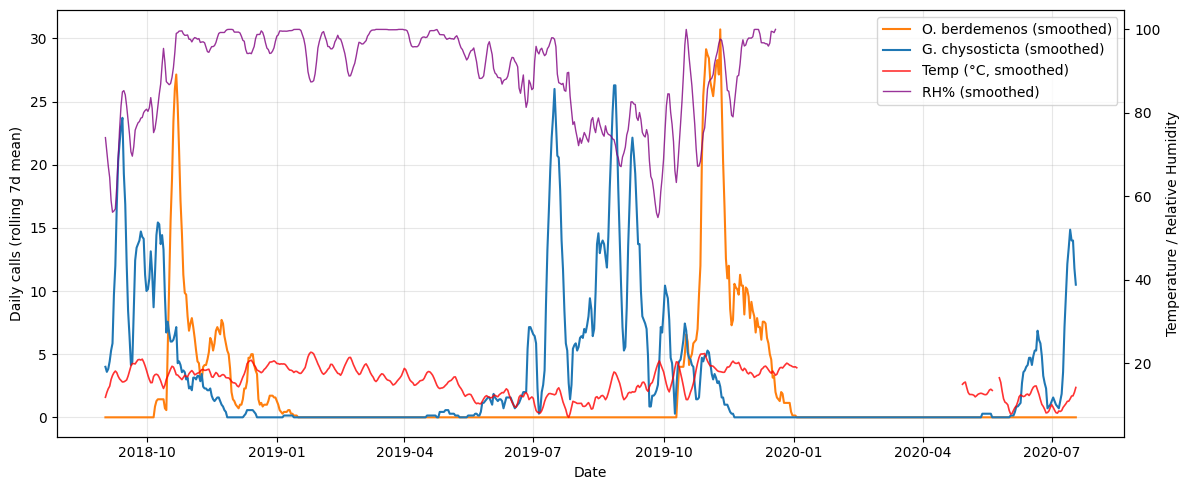

In [43]:
# Smooth first daily calls and weather, then plot (similar style to previous day-of-year plot)

# Combine daily series (already computed earlier)
daily_full = daily_calls[['Oreobates berdemenos', 'Gastrotheca chysosticta']].join(
    daily_weather[['Temp', 'RH%']]
)

# Choose smoothing window (days)
smoothing_window = 7  # adjust as needed
smoothed = daily_full.rolling(smoothing_window, center=True, min_periods=1).mean()

# Plot
fig_daily_smooth, ax_daily_smooth = plt.subplots(figsize=(12,5))

# Calls (primary axis)
ax_daily_smooth.plot(smoothed.index, smoothed['Oreobates berdemenos'],
                     label='O. berdemenos (smoothed)', color='tab:orange', linewidth=1.5)
ax_daily_smooth.plot(smoothed.index, smoothed['Gastrotheca chysosticta'],
                     label='G. chysosticta (smoothed)', color='tab:blue', linewidth=1.5)

ax_daily_smooth.set_xlabel('Date')
ax_daily_smooth.set_ylabel(f'Daily calls (rolling {smoothing_window}d mean)')
ax_daily_smooth.grid(alpha=0.3)

# Secondary axis for weather
ax_daily_env_smooth = ax_daily_smooth.twinx()
ax_daily_env_smooth.plot(smoothed.index, smoothed['Temp'],
                         color='red', linewidth=1.2, label='Temp (°C, smoothed)', alpha=0.8)
ax_daily_env_smooth.plot(smoothed.index, smoothed['RH%'],
                         color='purple', linewidth=1.0, label='RH% (smoothed)', alpha=0.8)
ax_daily_env_smooth.set_ylabel('Temperature / Relative Humidity')

# Combined legend
h1, l1 = ax_daily_smooth.get_legend_handles_labels()
h2, l2 = ax_daily_env_smooth.get_legend_handles_labels()
seen_ = set()
H, L = [], []
for h, l in list(zip(h1+h2, l1+l2)):
    if l not in seen_:
        seen_.add(l)
        H.append(h)
        L.append(l)
ax_daily_env_smooth.legend(H, L, loc='upper right')

plt.tight_layout()
plt.show()

# Store smoothed dataframe for later use
daily_smoothed = smoothed

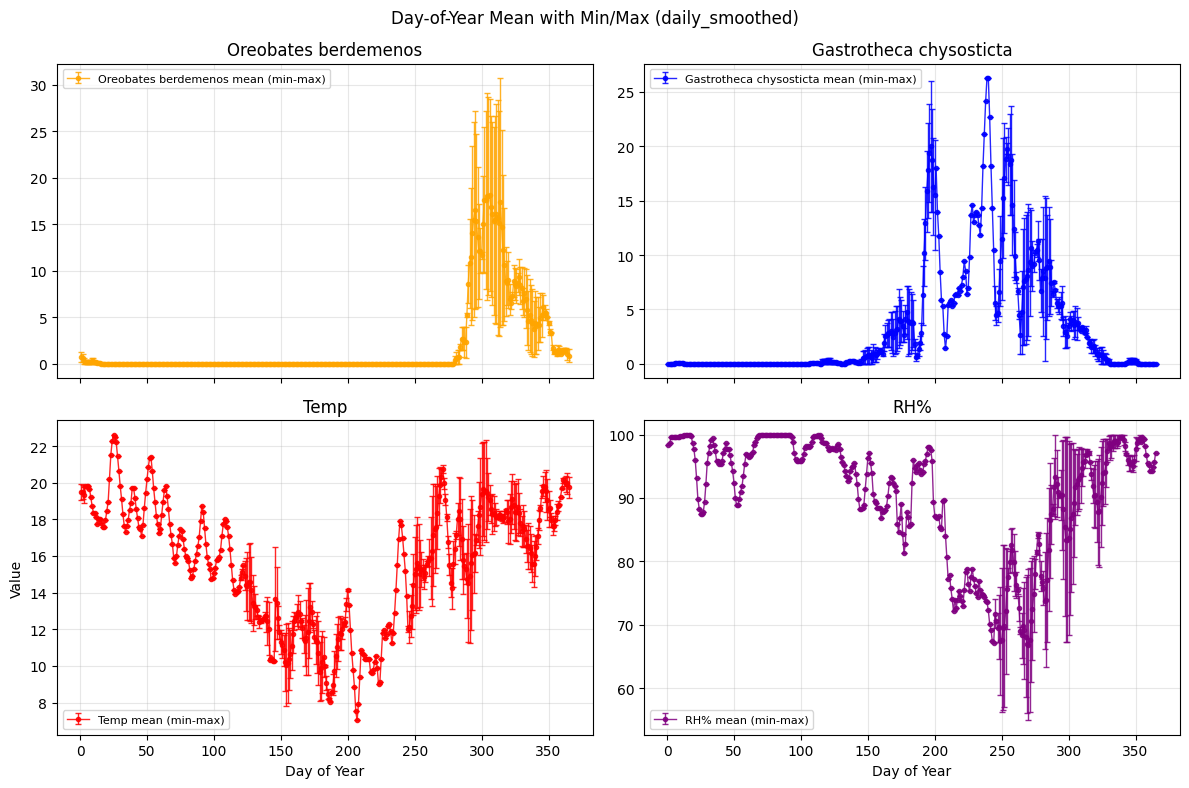

In [44]:
# Average (across years) of daily_smoothed by day-of-year with min/max error bars

# Prepare grouped stats
_daily_grp = (
    daily_smoothed.assign(doy=daily_smoothed.index.dayofyear)
                  .groupby('doy')
)
# MultiIndex columns: (variable, stat)
day_stats = _daily_grp.agg(['mean', 'min', 'max'])

# Helper to build asymmetric error (mean - min, max - mean)
def _err_bounds(var):
    m = day_stats[(var, 'mean')]
    lo = m - day_stats[(var, 'min')]
    hi = day_stats[(var, 'max')] - m
    return m, np.vstack([lo, hi])

# Ensure colors dict exists
if 'colors' not in globals():
    colors = {
        'Oreobates berdemenos': 'orange',
        'Gastrotheca chysosticta': 'blue',
        'Temp': 'red',
        'RH%': 'purple'
    }

vars_to_plot = ['Oreobates berdemenos', 'Gastrotheca chysosticta', 'Temp', 'RH%']
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

for ax, var in zip(axes, vars_to_plot):
    if (var, 'mean') not in day_stats.columns:
        ax.set_visible(False)
        continue
    mean_series, yerr = _err_bounds(var)
    ax.errorbar(mean_series.index, mean_series,
                yerr=yerr,
                fmt='-o',
                markersize=3,
                linewidth=1,
                ecolor=colors.get(var, 'gray'),
                color=colors.get(var, 'gray'),
                alpha=0.85,
                capsize=2,
                label=f'{var} mean (min-max)')
    ax.set_title(var)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8)

axes[-2].set_ylabel('Value')
axes[-1].set_xlabel('Day of Year')
axes[2].set_xlabel('Day of Year')

plt.suptitle('Day-of-Year Mean with Min/Max (daily_smoothed)')
plt.tight_layout()
plt.show()

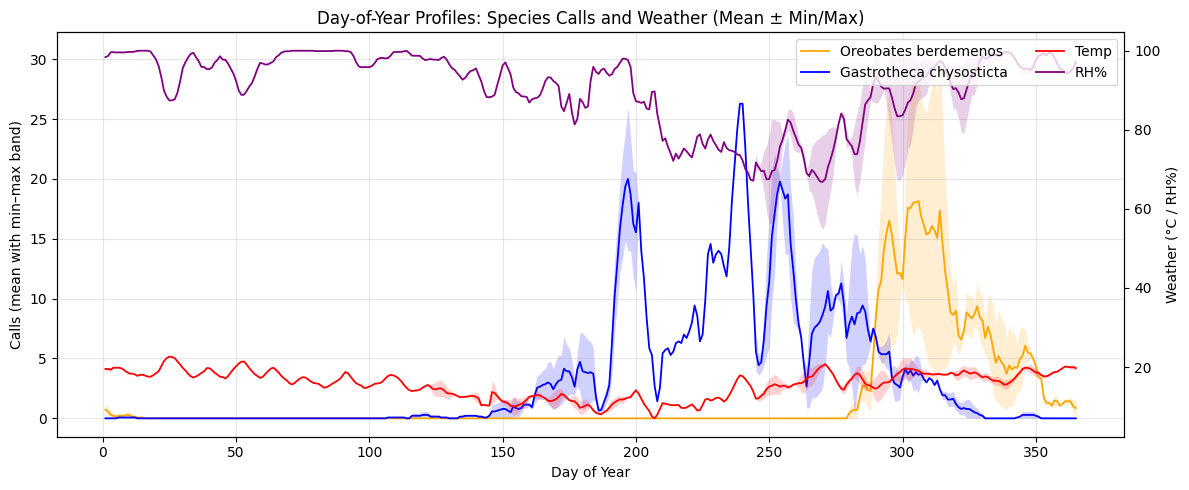

In [45]:
# Combine the four day-of-year plots (species + weather) into one figure
# Uses existing: day_stats, colors, vars_to_plot

doy_index = day_stats.index

# Split variables into species and weather for dual y-axes
species_vars = ['Oreobates berdemenos', 'Gastrotheca chysosticta']
weather_vars = ['Temp', 'RH%']

fig_combined, ax_left = plt.subplots(figsize=(12,5))
ax_right = ax_left.twinx()

# Helper to plot mean with min/max ribbon
def plot_with_band(ax, var, side='left'):
    mean_s = day_stats[(var, 'mean')]
    min_s  = day_stats[(var, 'min')]
    max_s  = day_stats[(var, 'max')]
    ax.plot(doy_index, mean_s, label=var, color=colors.get(var, 'gray'), linewidth=1.3)
    ax.fill_between(doy_index, min_s, max_s, color=colors.get(var, 'gray'), alpha=0.18, linewidth=0)

for v in species_vars:
    plot_with_band(ax_left, v)

for v in weather_vars:
    plot_with_band(ax_right, v)

ax_left.set_xlabel('Day of Year')
ax_left.set_ylabel('Calls (mean with min–max band)')
ax_right.set_ylabel('Weather (°C / RH%)')

ax_left.grid(alpha=0.3)

# Build combined legend
h_left, l_left = ax_left.get_legend_handles_labels()
h_right, l_right = ax_right.get_legend_handles_labels()
ax_right.legend(h_left + h_right, l_left + l_right, loc='upper right', ncol=2)

plt.title('Day-of-Year Profiles: Species Calls and Weather (Mean ± Min/Max)')
plt.tight_layout()
plt.show()

## Correlations

In [59]:
df[species_cols].head()

,Temp,RH%,Oreobates berdemenos,Gastrotheca chysosticta
DateTime,,,,
2018-09-02 00:00:00,4.553,100.0,0,0
2018-09-02 01:00:00,4.051,100.0,0,0
2018-09-02 02:00:00,4.553,100.0,0,0
2018-09-02 03:00:00,3.550,100.0,0,0
2018-09-02 04:00:00,3.048,100.0,0,0


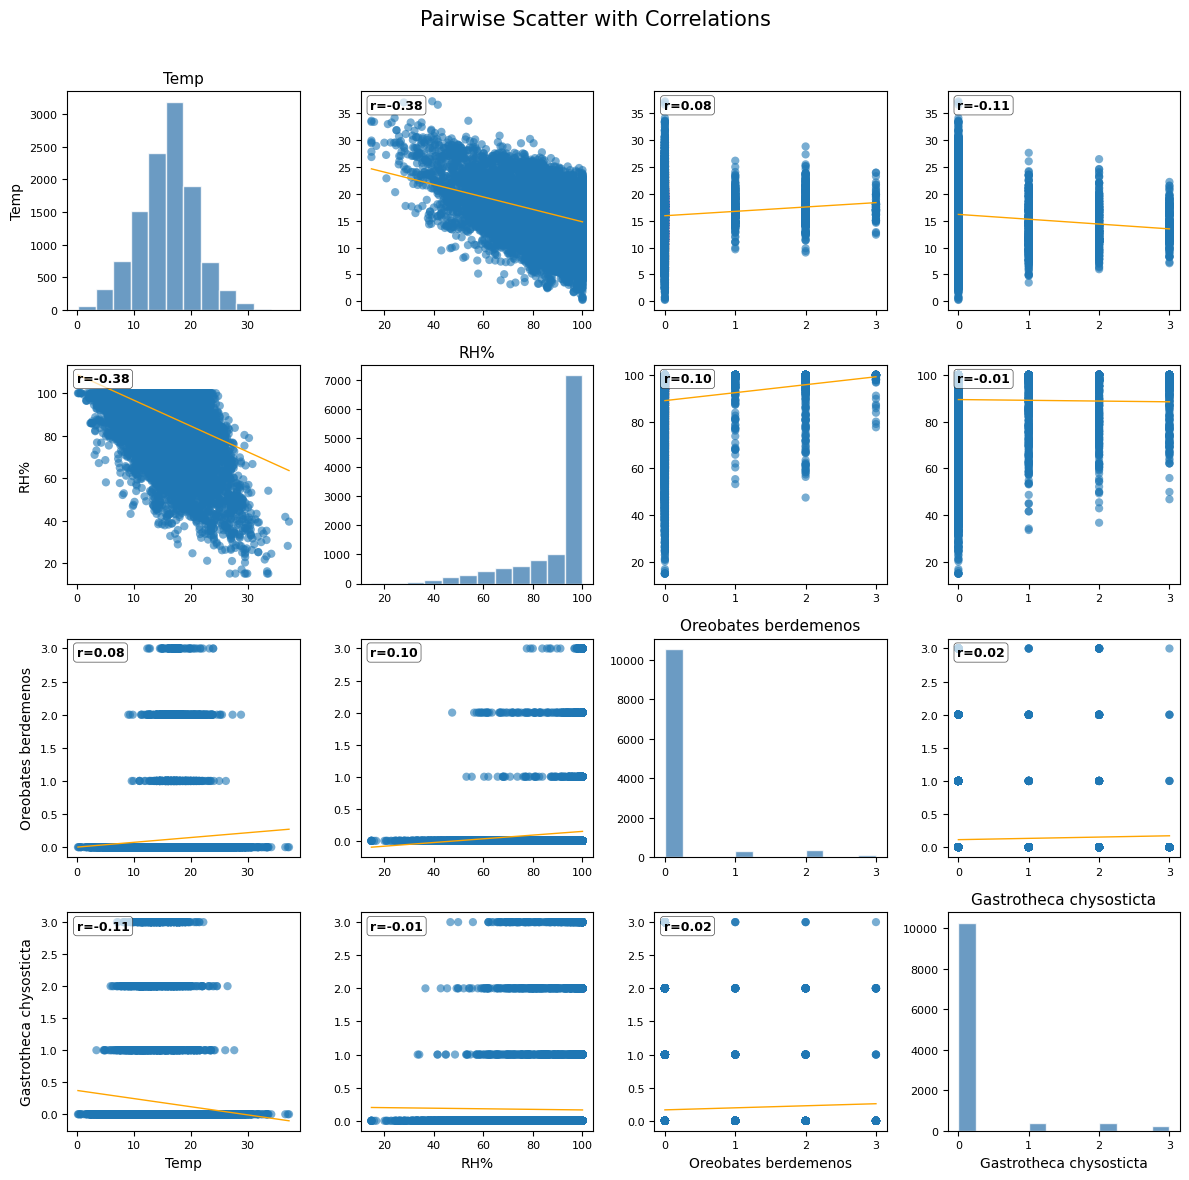

In [61]:
# Pairwise scatter matrix with correlations, diagonal histograms, and full tick scales

df_vars = df[species_cols].copy()
vars_ = list(df_vars.columns)
n = len(vars_)

data_matrix = df_vars[vars_]

corr_mat = data_matrix.corr()

fig, axes = plt.subplots(n, n, figsize=(3*n, 3*n))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

for i, ycol in enumerate(vars_):
    for j, xcol in enumerate(vars_):
        ax = axes[i, j]
        if i == j:
            vals = data_matrix[xcol].dropna()
            ax.hist(vals, bins=12, color='steelblue', alpha=0.8, edgecolor='white')
            ax.set_title(xcol, fontsize=11)
        else:
            x = data_matrix[xcol]
            y = data_matrix[ycol]
            ax.scatter(x, y, s=35, alpha=0.6, edgecolors='none', color='tab:blue')
            # Least–squares line if enough unique points
            if x.nunique() > 1 and y.nunique() > 1:
                m, b = np.polyfit(x, y, 1)
                xs = np.linspace(x.min(), x.max(), 50)
                ax.plot(xs, m*xs + b, color='orange', linewidth=1)
            r = corr_mat.loc[ycol, xcol]
            ax.text(0.04, 0.92, f"r={r:.2f}",
                    transform=ax.transAxes,
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.25', fc='white', alpha=0.7, lw=0.5))
        # Always show tick labels (retain scale)
        ax.tick_params(axis='both', labelsize=8)

        # Axis labels only on outer edges (but ticks remain everywhere)
        if i == n - 1:
            ax.set_xlabel(xcol, fontsize=10)
        if j == 0:
            ax.set_ylabel(ycol, fontsize=10)

fig.suptitle('Pairwise Scatter with Correlations', fontsize=15)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

# Granger Causality

In [7]:
# Granger / VAR causality test between the two species time series using no exogenous variables


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd

# Granger / VAR causality test between the two species time series

if 'DateTime' not in df.columns:
    df['DateTime'] = df.index

# 1. Prepare evenly spaced hourly series (sum per hour), fill missing with 0
cols = ['Oreobates berdemenos', 'Gastrotheca chysosticta']
df_gc = (
    df[cols]
)

# 2. ADF stationarity test; difference if non–stationary (p>0.05)
def adf_stationary(series, name):
    s = series.astype(float)
    if (s.var() == 0) or (s.nunique() < 3):
        return s, False, 1.0
    p = adfuller(s, autolag='AIC')[1]
    return s, True, p

stationary_series = {}
diff_needed = {}
adf_pvals = {}
for c in cols:
    s, ok, p = adf_stationary(df_gc[c], c)
    adf_pvals[c] = p
    if p > 0.05:
        # first difference
        s_diff = s.diff().dropna()
        # Re-test (optional, not required for workflow)
        stationary_series[c] = s_diff
        diff_needed[c] = True
    else:
        stationary_series[c] = s
        diff_needed[c] = False

# Align after differencing (drop NaNs introduced by differencing)
gc_data = pd.concat(stationary_series, axis=1).dropna()

# Ensure enough data
if len(gc_data) < 30:
    raise ValueError("Not enough data after preprocessing for VAR/Granger test.")

# 3. Select VAR lag order (up to 24 hours or len/5)
maxlags = min(24, max(5, len(gc_data)//5))
order_res = VAR(gc_data).select_order(maxlags=maxlags)
lag_aic = order_res.selected_orders.get('aic')
# fallback if None
selected_lag = lag_aic if lag_aic is not None else next(v for v in order_res.selected_orders.values() if v is not None)

# Guard: lag must be >=1
if not selected_lag or selected_lag < 1:
    selected_lag = 1

# 4. Fit VAR
model = VAR(gc_data)
var_res = model.fit(selected_lag)

# 5. Causality tests (directional)
# Test: does Oreobates -> Gastrotheca?
res_OB_to_GC = var_res.test_causality('Gastrotheca chysosticta', ['Oreobates berdemenos'], kind='f')

# Test: does Gastrotheca -> Oreobates?
res_GC_to_OB = var_res.test_causality('Oreobates berdemenos', ['Gastrotheca chysosticta'], kind='f')

print("=== Data summary ===")
print(f"Rows (hourly, after differencing if applied): {len(gc_data)}")
print("ADF p-values (original series):")
for c in cols:
    print(f"  {c}: p={adf_pvals[c]:.4g}  -> differenced: {diff_needed[c]}")
print(f"\nSelected VAR lag (AIC): {selected_lag}")
print("\n=== Direction: Oreobates berdemenos -> Gastrotheca chysosticta ===")
print(f"F-test p-value: {res_OB_to_GC.pvalue:.4g}")
print(res_OB_to_GC.summary())

print("\n=== Direction: Gastrotheca chysosticta -> Oreobates berdemenos ===")
print(f"F-test p-value: {res_GC_to_OB.pvalue:.4g}")
print(res_GC_to_OB.summary())

print("\nInterpretation guide:")
print("- Low p-value (<0.05) suggests rejecting null of 'no Granger causality' in that direction.")
print("- Differencing applied where ADF indicated non-stationarity (p>0.05).")
print("- Results are on (possibly differenced) series; ecological interpretation should map back to original counts.")

/Users/ash/Library/CloudStorage/OneDrive-Nexus365/PHD/arunan/Coding/yungas_aruna/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


=== Data summary ===
Rows (hourly, after differencing if applied): 11303
ADF p-values (original series):
  Oreobates berdemenos: p=4.643e-12  -> differenced: False
  Gastrotheca chysosticta: p=1.239e-15  -> differenced: False

Selected VAR lag (AIC): 24

=== Direction: Oreobates berdemenos -> Gastrotheca chysosticta ===
F-test p-value: 0.3477
Granger causality F-test. H_0: Oreobates berdemenos does not Granger-cause Gastrotheca chysosticta. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value           df         
-----------------------------------------------------------
         1.088          1.518   0.348 (24, np.int64(22460))
-----------------------------------------------------------

=== Direction: Gastrotheca chysosticta -> Oreobates berdemenos ===
F-test p-value: 0.02894
Granger causality F-test. H_0: Gastrotheca chysosticta does not Granger-cause Oreobates berdemenos. Conclusion: reject H_0 at 5% significance level.
Test statistic Cr

/Users/ash/Library/CloudStorage/OneDrive-Nexus365/PHD/arunan/Coding/yungas_aruna/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Treat calls as ordinal, add weather, hour, day as exogenous variables

In [8]:
# Ordered-logit "Granger" causality with exogenous controls (temp, RH, diurnal)
# Directional tests: Oreo -> Gastro and Gastro -> Oreo

import numpy as np
import pandas as pd
from itertools import product
from typing import Tuple, Dict, List

from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import chi2


# ----------------------------
# Utilities
# ----------------------------

def add_time_features(dfh: pd.DataFrame) -> pd.DataFrame:
    """Add diurnal sin/cos based on the DateTimeIndex (hour + minute)."""
    h = dfh.index.hour + dfh.index.minute / 60.0
    day = dfh.index.dayofyear + h / 24.0
    dfh = dfh.copy()
    dfh["hour_sin"] = np.sin(2 * np.pi * h / 24.0)
    dfh["hour_cos"] = np.cos(2 * np.pi * h / 24.0)
    dfh['day_sin'] = np.sin(2 * np.pi * day / 365.25)
    dfh['day_cos'] = np.cos(2 * np.pi * day / 365.25)
    return dfh

def zscore(df: pd.DataFrame, cols: List[str]) -> pd.DataFrame:
    '''Normalize specified columns to mean 0, std 1; add as col_z.'''
    df = df.copy()
    for c in cols:
        mu, sd = df[c].mean(), df[c].std()
        if not np.isfinite(sd) or sd == 0:
            sd = 1.0
        df[c + "_z"] = (df[c] - mu) / sd
    return df

def make_lags(df: pd.DataFrame, cols: List[str], L: int) -> pd.DataFrame:
    """Create lagged columns col_L1..col_LL for each col."""
    out = {}
    for c in cols:
        for l in range(1, L + 1):
            out[f"{c}_L{l}"] = df[c].shift(l)
    return pd.DataFrame(out, index=df.index)

def aic_of_fit(res) -> float:
    """Compute AIC for OrderedModel fit result."""
    k = len(res.params)
    return -2 * res.llf + 2 * k

def fit_ordered(endog: pd.Series, exog: pd.DataFrame, distr: str = "logit"):
    """
    Fit ordered logit/probit without an explicit constant (thresholds play that role).
    endog must be integer categories (0..K-1).
    """
    # Drop any rows with missing exog (endog should already be aligned)
    mask = endog.notna()
    mask &= exog.notna().all(axis=1)
    y = endog[mask].astype(int)
    X = exog.loc[mask]

    # Quick rank check to catch collinearity early (optional)
    rank = np.linalg.matrix_rank(X.values)
    if rank < X.shape[1]:
        raise ValueError(f"Design matrix not full rank (rank={rank} < {X.shape[1]}). "
                         f"Reduce lags / remove redundant columns (do not lag sin/cos).")

    model = OrderedModel(y, X, distr=distr)
    # Increase maxiter if needed; method can be 'bfgs'/'lbfgs'/'newton'
    res = model.fit(method="lbfgs", maxiter=2000, disp=False)
    return res, y.index

def lr_test(res_full, res_rest, df_restr: int) -> Tuple[float, float]:
    """LR stat and chi-square p-value."""
    LR = 2 * (res_full.llf - res_rest.llf)
    p = 1 - chi2.cdf(LR, df_restr)
    return LR, p



In [9]:

# ----------------------------
# Main: Ordinal Granger tester
# ----------------------------

def ordinal_granger_with_exog(
    df_hourly: pd.DataFrame,
    gastro_col: str,
    oreo_col: str,
    temp_col: str,
    rh_col: str,
    max_p: int = 24,          # candidate max call lags to search over
    s_exog: int = 6,          # weather lag span (0..s_exog)
    include_hour: bool = True,
    distr: str = "logit",     # "logit" or "probit"
    p_fixed: int | None = None,   # set an explicit p, else AIC-select
) -> Dict:
    """
    Perform directional ordinal Granger tests with exogenous controls:
    - Oreo -> Gastro (conditional on Gastro lags, temp/RH, diurnal)
    - Gastro -> Oreo (conditional on Oreo lags, temp/RH, diurnal)
    """

    # 1) Prepare base frame (assumes hourly DateTimeIndex)
    req = [gastro_col, oreo_col, temp_col, rh_col]
    data = df_hourly.sort_index()[req].copy()

    # Ensure integer categories 0..3 for calls
    for c in (gastro_col, oreo_col):
        data[c] = data[c].astype(int)

    # Add diurnal & standardized weather
    data = add_time_features(data) if include_hour else data.assign(hour_sin=0.0, hour_cos=0.0)
    data = zscore(data, [temp_col, rh_col])

    # Build EXOG: current sin/cos + weather lags only
    EXOG_parts = [data[["hour_sin", "hour_cos",'day_sin','day_cos']]]
    for base in [temp_col + "_z", rh_col + "_z"]:
        cols = {f"{base}_L0": data[base]}
        for L in range(1, s_exog + 1):
            cols[f"{base}_L{L}"] = data[base].shift(L)
        EXOG_parts.append(pd.DataFrame(cols, index=data.index))
    EXOG = pd.concat(EXOG_parts, axis=1)

    
    # Helper to fit a direction (X -> Y)
    def fit_direction(Y_name: str, X_name: str, p_choice: int | None):
        # If p not fixed, select by AIC over 1..max_p on the FULL model
        p_grid = [p_choice] if p_choice else list(range(1, max_p + 1))
        best = {"aic": np.inf, "p": None, "res_full": None, "res_rest": None, "used_idx": None}

        for p in p_grid:
            # Build lag matrices
            own_lags = make_lags(data, [Y_name], p)
            cross_lags = make_lags(data, [X_name], p)

            # Full design = own lags + cross lags + exogenous
            X_full = pd.concat([own_lags, cross_lags, EXOG], axis=1)

            # Restricted design = drop cross lags
            X_rest = pd.concat([own_lags, EXOG], axis=1)

            # Align endog/exog and drop NA from lagging
            endog = data[Y_name]

            # Fit both models on the same aligned index (intersection of non-NA rows)
            fit_full, idx_full = fit_ordered(endog, X_full, distr=distr)
            fit_rest, idx_rest = fit_ordered(endog, X_rest.loc[idx_full], distr=distr)  # fit on idx_full (should be all records but just to make sure)

            res_full, idx = fit_ordered(endog, X_full, distr=distr)
            # Fit restricted on the **same rows** to make LR valid
            res_rest, _    = fit_ordered(endog.loc[idx], X_rest.loc[idx], distr=distr)


            # Compute AIC for the FULL model
            aic = aic_of_fit(fit_full)
            print(f"Direction {X_name} → {Y_name}, p={p}: AIC={aic:.3f}, n={len(idx_full)}")
            if aic < best["aic"]:
                best.update({
                    "aic": aic,
                    "p": p,
                    "res_full": fit_full,
                    "res_rest": fit_rest,
                    "used_idx": idx_full,
                    "q": p,  # number of cross-lag restrictions when lags enter linearly
                })

        # LR test on the chosen p
        LR, pval = lr_test(best["res_full"], best["res_rest"], best["q"])
        return {
            "direction": f"{X_name} → {Y_name}",
            "selected_p": best["p"],
            "LR": float(LR),
            "df": int(best["q"]),
            "p_value": float(pval),
            "aic_full": float(aic_of_fit(best["res_full"])),
            "n_obs": int(len(best["used_idx"])),
            "full_params": best["res_full"].params,   # includes thresholds and coefficients
            "rest_params": best["res_rest"].params,
        }

    # Run both directions
    res_Oreo_to_Gastro = fit_direction(Y_name=gastro_col, X_name=oreo_col, p_choice=p_fixed)
    res_Gastro_to_Oreo = fit_direction(Y_name=oreo_col, X_name=gastro_col, p_choice=p_fixed)

    return {
        "settings": {
            "p_fixed": p_fixed,
            "max_p_grid": max_p if p_fixed is None else None,
            "weather_lag_span": s_exog,
            "include_hour": include_hour,
            "link": distr
        },
        "Oreo_to_Gastro": res_Oreo_to_Gastro,
        "Gastro_to_Oreo": res_Gastro_to_Oreo
    }



In [10]:

# ----------------------------
# Example usage
# ----------------------------
# df must be an hourly-indexed DataFrame with columns:
#   'Gastro', 'Oreo', 'temperature', 'relative_humidity'
# e.g., df.index = pd.DatetimeIndex at hourly frequency

    
results = ordinal_granger_with_exog(
    df_hourly=df,
    gastro_col="Gastrotheca chysosticta",
    oreo_col="Oreobates berdemenos",
    temp_col="Temp",
    rh_col="RH%",
    max_p=24,          # search p=1..12; or set p_fixed=6 to lock it
    s_exog=6,          # include 0..6 hour lags of weather
    include_hour=True, # add sin/cos(hour)
    distr="logit",     # or "probit"
    p_fixed=11
)
print(results["Oreo_to_Gastro"])
print(results["Gastro_to_Oreo"])

Direction Oreobates berdemenos → Gastrotheca chysosticta, p=11: AIC=4499.089, n=11292
Direction Gastrotheca chysosticta → Oreobates berdemenos, p=11: AIC=3533.664, n=11292
{'direction': 'Oreobates berdemenos → Gastrotheca chysosticta', 'selected_p': 11, 'LR': 20.738387658884676, 'df': 11, 'p_value': 0.03618497277515276, 'aic_full': 4499.088981056077, 'n_obs': 11292, 'full_params': Gastrotheca chysosticta_L1     1.206151
Gastrotheca chysosticta_L2     0.230055
Gastrotheca chysosticta_L3     0.183533
Gastrotheca chysosticta_L4    -0.091926
Gastrotheca chysosticta_L5     0.101060
Gastrotheca chysosticta_L6     0.024090
Gastrotheca chysosticta_L7     0.117199
Gastrotheca chysosticta_L8     0.284111
Gastrotheca chysosticta_L9    -0.015242
Gastrotheca chysosticta_L10    0.049434
Gastrotheca chysosticta_L11   -0.556898
Oreobates berdemenos_L1        0.245331
Oreobates berdemenos_L2       -0.190670
Oreobates berdemenos_L3       -0.106833
Oreobates berdemenos_L4       -0.157934
Oreobates berdem

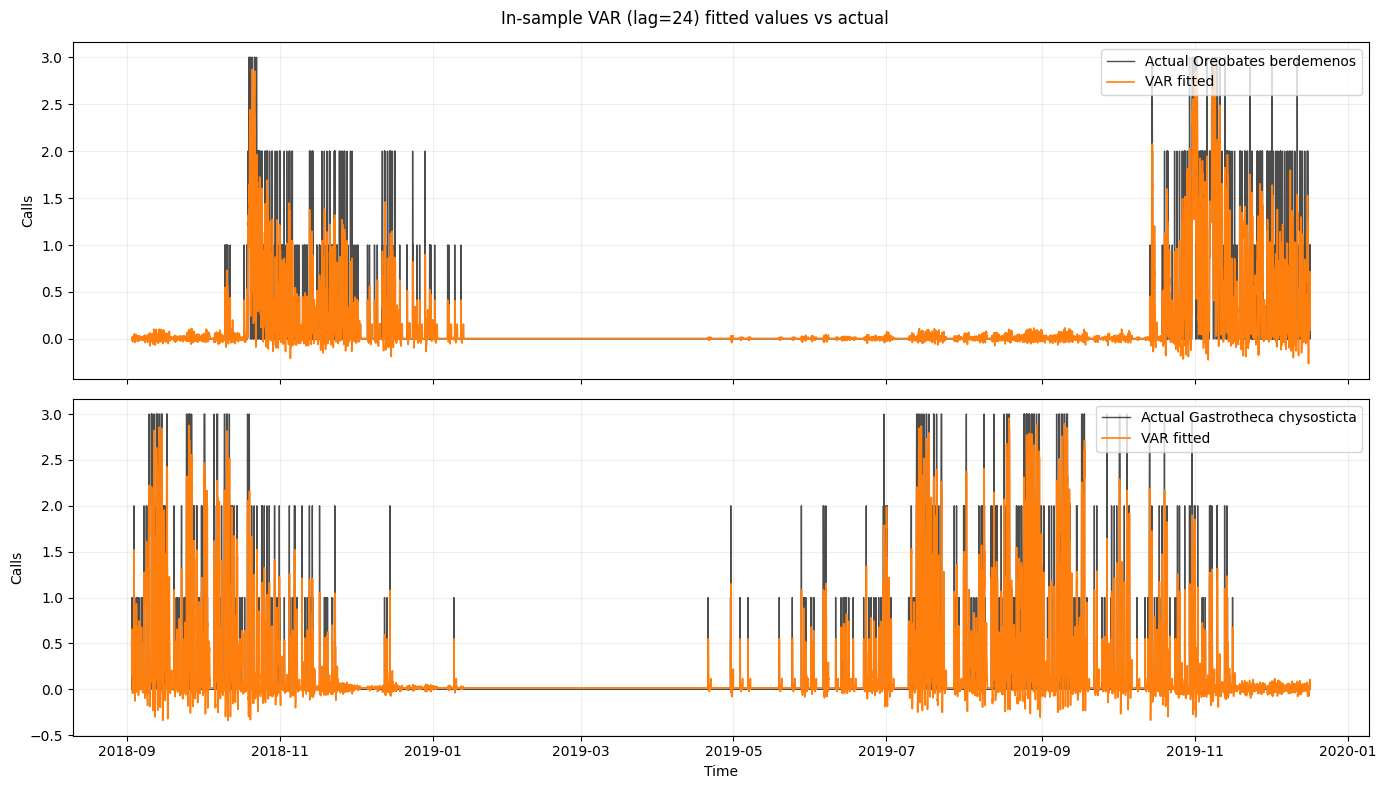

In-sample error metrics: {'Oreobates berdemenos': {'MAE': 0.11048957688229422, 'RMSE': 0.30409334971580476}, 'Gastrotheca chysosticta': {'MAE': 0.1425934602534056, 'RMSE': 0.34783844533892505}}


In [11]:
from math import sqrt
import numpy as np

# Plot in-sample (fitted) VAR predictions vs actual counts for both species

# Ensure required objects exist
assert 'var_res' in globals(), "VAR model (var_res) not found. Run the VAR cell first."
assert 'df' in globals() and 'cols' in globals(), "Original dataframe and cols list required."

lag = var_res.k_ar
fitted = var_res.fittedvalues  # DataFrame with same column order as gc_data (cols)

# Actual data aligned to fitted index
actual = df[cols].loc[fitted.index]

# Quick sanity check
common_index = fitted.index.intersection(actual.index)
fitted = fitted.loc[common_index]
actual = actual.loc[common_index]

# Plot
fig_pred, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
for ax, species in zip(axes, cols):
    ax.plot(actual.index, actual[species], label=f'Actual {species}', color='black', linewidth=1, alpha=0.7)
    ax.plot(fitted.index, fitted[species], label='VAR fitted', color='tab:orange', linewidth=1.2)
    ax.set_ylabel('Calls')
    ax.legend(loc='upper right')
    ax.grid(alpha=0.2)

axes[-1].set_xlabel('Time')
plt.suptitle(f'In-sample VAR (lag={lag}) fitted values vs actual')
plt.tight_layout()
plt.show()

# Optional simple accuracy metrics
metrics = {}
for species in cols:
    resid = actual[species] - fitted[species]
    metrics[species] = {
        'MAE': float(np.abs(resid).mean()),
        'RMSE': float(sqrt((resid**2).mean()))
    }
print("In-sample error metrics:", metrics)

Ordinal (ordered logit) in-sample error metrics: {'Gastrotheca chysosticta': {'MAE': 0.11943837429174994, 'RMSE': 0.3239220924100091}, 'Oreobates berdemenos': {'MAE': 0.0987727091454859, 'RMSE': 0.29675541903460984}}


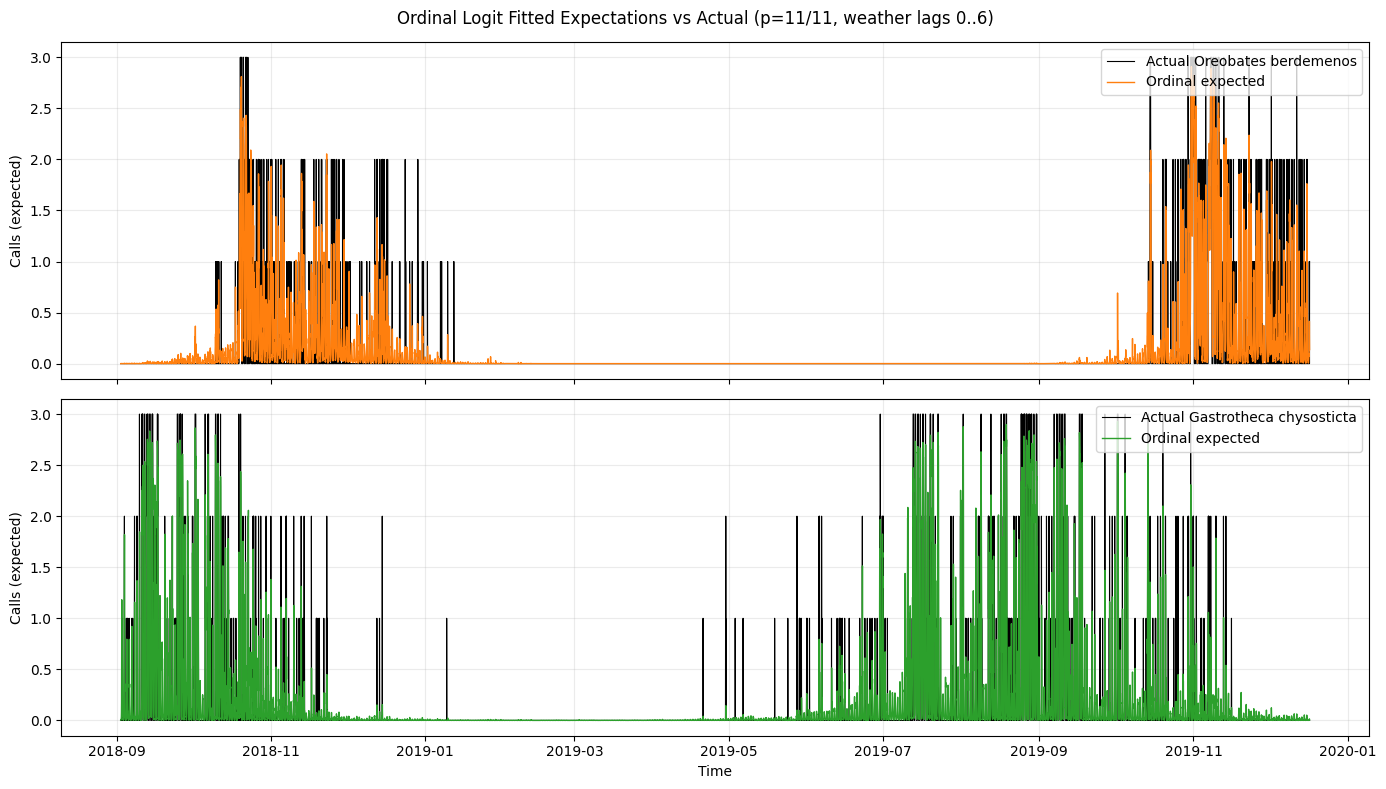

In [12]:
# Reconstruct and plot ordinal logistic (ordered logit) fitted expectations vs actual counts
# Uses the same feature engineering as in ordinal_granger_with_exog with selected p values.

# Settings recovered from previous run
gastro_col = "Gastrotheca chysosticta"
oreo_col = "Oreobates berdemenos"
temp_col = "Temp"
rh_col = "RH%"
p_gastro = results["Oreo_to_Gastro"]["selected_p"]
p_oreo = results["Gastro_to_Oreo"]["selected_p"]
s_exog = results["settings"]["weather_lag_span"]
distr = results["settings"]["link"]

# Base data (ensure sorting)
data = df[[gastro_col, oreo_col, temp_col, rh_col]].sort_index().copy()
data[gastro_col] = data[gastro_col].astype(int)
data[oreo_col] = data[oreo_col].astype(int)

# Add time + weather transforms (functions already defined earlier)
data = add_time_features(data)
data = zscore(data, [temp_col, rh_col])

# Build EXOG matrix (diurnal + weather lags 0..s_exog)
EXOG_parts = [data[["hour_sin", "hour_cos", "day_sin", "day_cos"]]]
for base in [temp_col + "_z", rh_col + "_z"]:
    cols_ex = {f"{base}_L0": data[base]}
    for L in range(1, s_exog + 1):
        cols_ex[f"{base}_L{L}"] = data[base].shift(L)
    EXOG_parts.append(pd.DataFrame(cols_ex, index=data.index))
EXOG = pd.concat(EXOG_parts, axis=1)

def fit_direction_predict(Y_name: str, X_name: str, p: int):
    """Fit ordered model for Y with its own and cross lags; return expected value series."""
    own_lags = make_lags(data, [Y_name], p)
    cross_lags = make_lags(data, [X_name], p)
    X_full = pd.concat([own_lags, cross_lags, EXOG], axis=1)
    endog = data[Y_name]

    mask = endog.notna() & X_full.notna().all(axis=1)
    y_f = endog[mask].astype(int)
    X_f = X_full[mask]

    model = OrderedModel(y_f, X_f, distr=distr)
    res = model.fit(method="lbfgs", maxiter=2000, disp=False)

    probs = res.predict(exog=X_f)  # (n, K)
    # Determine ordered category labels from observed y
    cats = np.sort(y_f.unique())
    # Expected value E[Y] = sum_k p_k * k
    exp_vals = (probs * cats).sum(axis=1)
    return exp_vals, y_f, res

# Fit both directions (each gives prediction for its Y)
gastro_exp, gastro_y, gastro_res = fit_direction_predict(gastro_col, oreo_col, p_gastro)
oreo_exp, oreo_y, oreo_res       = fit_direction_predict(oreo_col, gastro_col, p_oreo)

# Align predictions into single DataFrame
pred_index = gastro_exp.index.intersection(oreo_exp.index)
ordinal_pred = pd.DataFrame({
    f"{gastro_col}_pred": gastro_exp.loc[pred_index],
    f"{oreo_col}_pred": oreo_exp.loc[pred_index],
    gastro_col: data[gastro_col].loc[pred_index],
    oreo_col: data[oreo_col].loc[pred_index]
}, index=pred_index)

# Compute error metrics
ordinal_metrics = {}
for col, pred_col in [(gastro_col, f"{gastro_col}_pred"),
                      (oreo_col, f"{oreo_col}_pred")]:
    actual_vals = ordinal_pred[col]
    pred_vals = ordinal_pred[pred_col]
    resid_vals = actual_vals - pred_vals
    ordinal_metrics[col] = {
        "MAE": float(np.abs(resid_vals).mean()),
        "RMSE": float(np.sqrt((resid_vals**2).mean()))
    }

print("Ordinal (ordered logit) in-sample error metrics:", ordinal_metrics)

# Plot
fig_ord, axes_ord = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
for ax_plot, (col, pred_col, color) in zip(
    axes_ord,
    [(oreo_col, f"{oreo_col}_pred", "tab:orange"),
     (gastro_col, f"{gastro_col}_pred", "tab:green")]
):
    ax_plot.plot(ordinal_pred.index, ordinal_pred[col], label=f"Actual {col}", color="black", linewidth=0.8)
    ax_plot.plot(ordinal_pred.index, ordinal_pred[pred_col], label="Ordinal expected", color=color, linewidth=1.0)
    ax_plot.set_ylabel('Calls (expected)')
    ax_plot.legend(loc='upper right')
    ax_plot.grid(alpha=0.25)

axes_ord[-1].set_xlabel('Time')
plt.suptitle(f'Ordinal Logit Fitted Expectations vs Actual (p={p_oreo}/{p_gastro}, weather lags 0..{s_exog})')
plt.tight_layout()
plt.show()

# Store for later use
ordinal_predictions = ordinal_pred

Ordinal (ordered logit) in-sample error metrics: {'Gastrotheca chysosticta': {'MAE': 0.09210060219624513, 'RMSE': 0.38225795964923553}, 'Oreobates berdemenos': {'MAE': 0.07793127878143818, 'RMSE': 0.3553647350743555}}


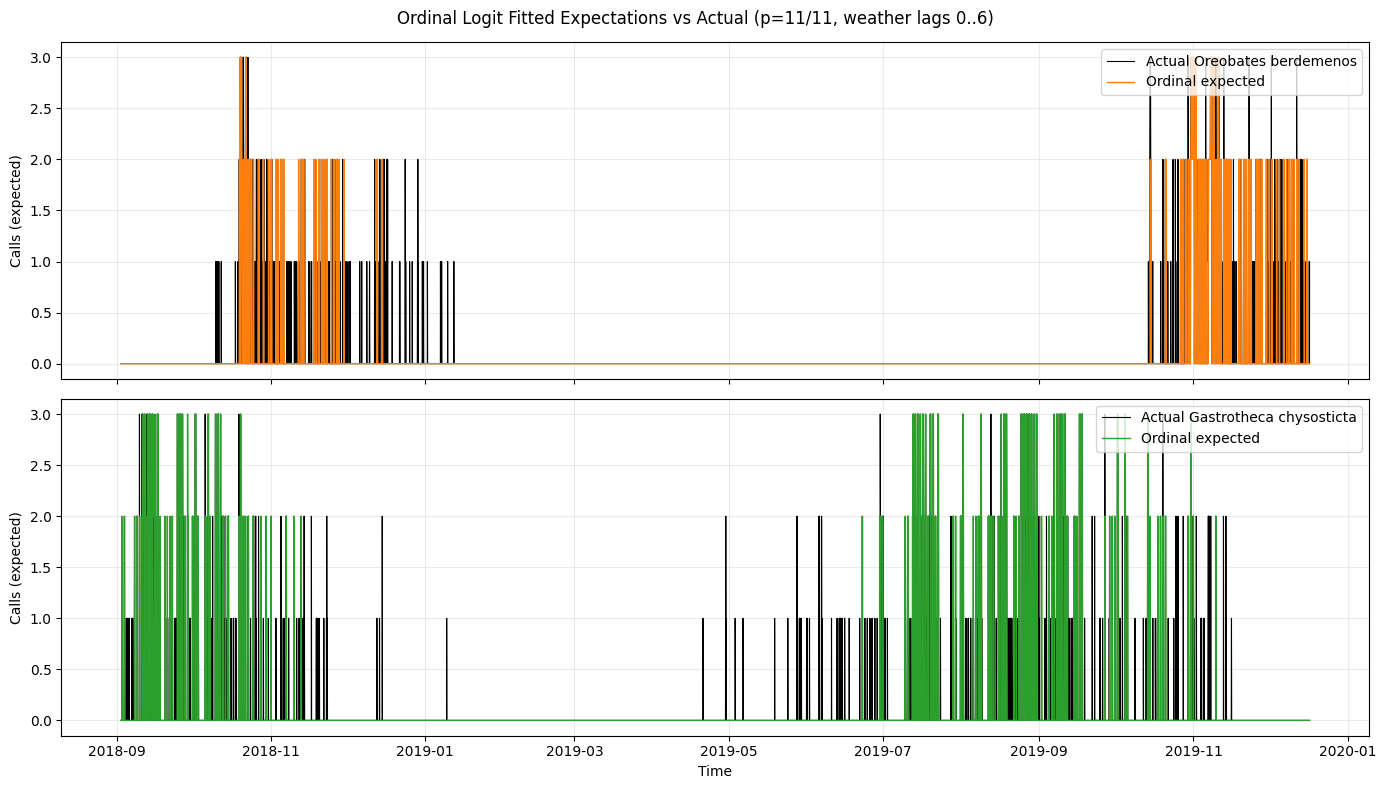

In [13]:
# Reconstruct and plot ordinal logistic (ordered logit) fitted MAP predicted classes vs actual counts
# Uses the same feature engineering as in ordinal_granger_with_exog with selected p values.

# Settings recovered from previous run
gastro_col = "Gastrotheca chysosticta"
oreo_col = "Oreobates berdemenos"
temp_col = "Temp"
rh_col = "RH%"
p_gastro = results["Oreo_to_Gastro"]["selected_p"]
p_oreo = results["Gastro_to_Oreo"]["selected_p"]
s_exog = results["settings"]["weather_lag_span"]
distr = results["settings"]["link"]

# Base data (ensure sorting)
data = df[[gastro_col, oreo_col, temp_col, rh_col]].sort_index().copy()
data[gastro_col] = data[gastro_col].astype(int)
data[oreo_col] = data[oreo_col].astype(int)

# Add time + weather transforms (functions already defined earlier)
data = add_time_features(data)
data = zscore(data, [temp_col, rh_col])

# Build EXOG matrix (diurnal + weather lags 0..s_exog)
EXOG_parts = [data[["hour_sin", "hour_cos", "day_sin", "day_cos"]]]
for base in [temp_col + "_z", rh_col + "_z"]:
    cols_ex = {f"{base}_L0": data[base]}
    for L in range(1, s_exog + 1):
        cols_ex[f"{base}_L{L}"] = data[base].shift(L)
    EXOG_parts.append(pd.DataFrame(cols_ex, index=data.index))
EXOG = pd.concat(EXOG_parts, axis=1)

def fit_direction_predict(Y_name: str, X_name: str, p: int):
    """Fit ordered model for Y with its own and cross lags; return expected value series."""
    own_lags = make_lags(data, [Y_name], p)
    cross_lags = make_lags(data, [X_name], p)
    X_full = pd.concat([own_lags, cross_lags, EXOG], axis=1)
    endog = data[Y_name]

    mask = endog.notna() & X_full.notna().all(axis=1)
    y_f = endog[mask].astype(int)
    X_f = X_full[mask]

    model = OrderedModel(y_f, X_f, distr=distr)
    res = model.fit(method="lbfgs", maxiter=2000, disp=False)

    probs = res.predict(exog=X_f)  # (n, K)
    # Determine ordered category labels from observed y
    cats = np.sort(y_f.unique())
    # Most probable class prediction (MAP)
    pred_class = pd.Series(cats[np.argmax(probs.values, axis=1)], index=probs.index)
    return pred_class, y_f, res

# Fit both directions (each gives prediction for its Y)
gastro_exp, gastro_y, gastro_res = fit_direction_predict(gastro_col, oreo_col, p_gastro)
oreo_exp, oreo_y, oreo_res       = fit_direction_predict(oreo_col, gastro_col, p_oreo)

# Align predictions into single DataFrame
pred_index = gastro_exp.index.intersection(oreo_exp.index)
ordinal_pred = pd.DataFrame({
    f"{gastro_col}_pred": gastro_exp.loc[pred_index],
    f"{oreo_col}_pred": oreo_exp.loc[pred_index],
    gastro_col: data[gastro_col].loc[pred_index],
    oreo_col: data[oreo_col].loc[pred_index]
}, index=pred_index)

# Compute error metrics
ordinal_metrics = {}
for col, pred_col in [(gastro_col, f"{gastro_col}_pred"),
                      (oreo_col, f"{oreo_col}_pred")]:
    actual_vals = ordinal_pred[col]
    pred_vals = ordinal_pred[pred_col]
    resid_vals = actual_vals - pred_vals
    ordinal_metrics[col] = {
        "MAE": float(np.abs(resid_vals).mean()),
        "RMSE": float(np.sqrt((resid_vals**2).mean()))
    }

print("Ordinal (ordered logit) in-sample error metrics:", ordinal_metrics)

# Plot
fig_ord, axes_ord = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
for ax_plot, (col, pred_col, color) in zip(
    axes_ord,
    [(oreo_col, f"{oreo_col}_pred", "tab:orange"),
     (gastro_col, f"{gastro_col}_pred", "tab:green")]
):
    ax_plot.plot(ordinal_pred.index, ordinal_pred[col], label=f"Actual {col}", color="black", linewidth=0.8)
    ax_plot.plot(ordinal_pred.index, ordinal_pred[pred_col], label="Ordinal expected", color=color, linewidth=1.0)
    ax_plot.set_ylabel('Calls (expected)')
    ax_plot.legend(loc='upper right')
    ax_plot.grid(alpha=0.25)

axes_ord[-1].set_xlabel('Time')
plt.suptitle(f'Ordinal Logit Fitted Expectations vs Actual (p={p_oreo}/{p_gastro}, weather lags 0..{s_exog})')
plt.tight_layout()
plt.show()

# Store for later use
ordinal_predictions = ordinal_pred

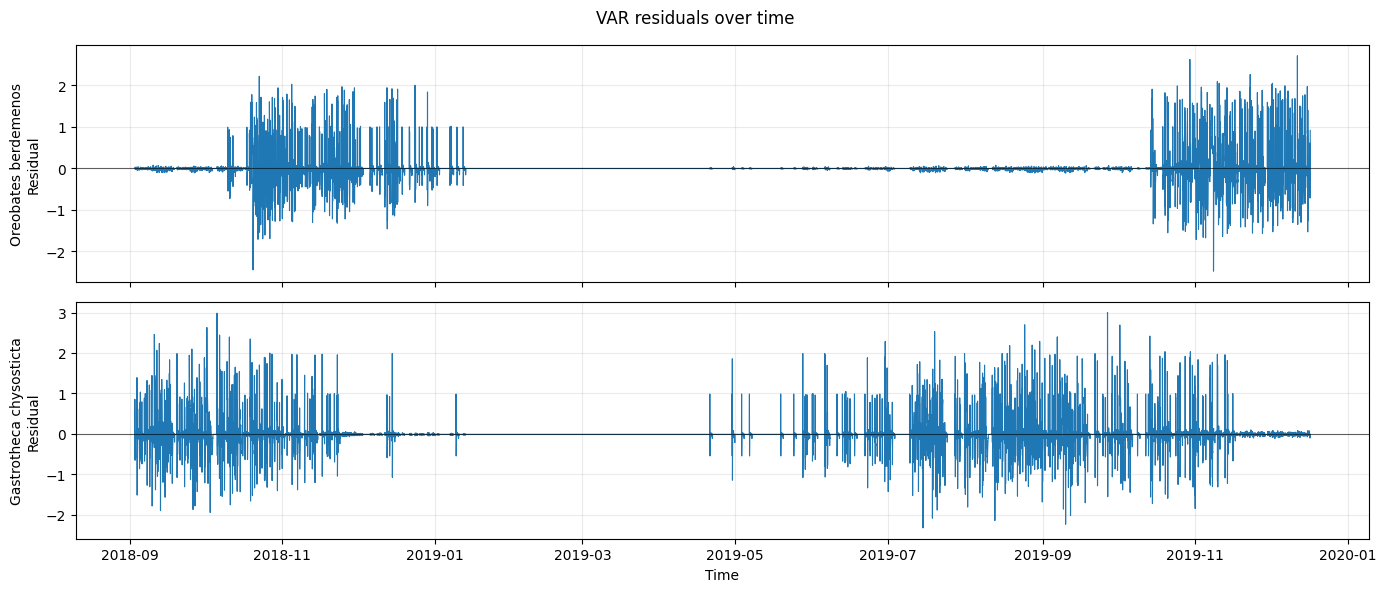

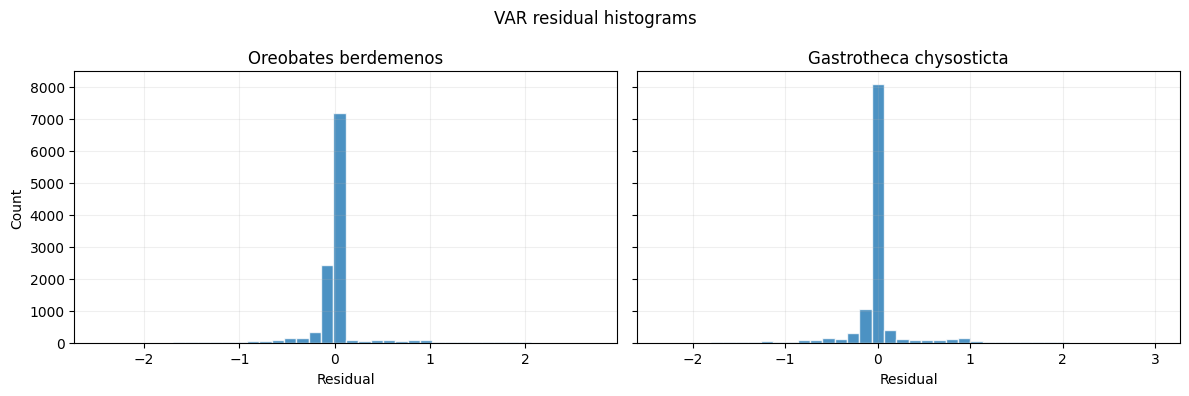

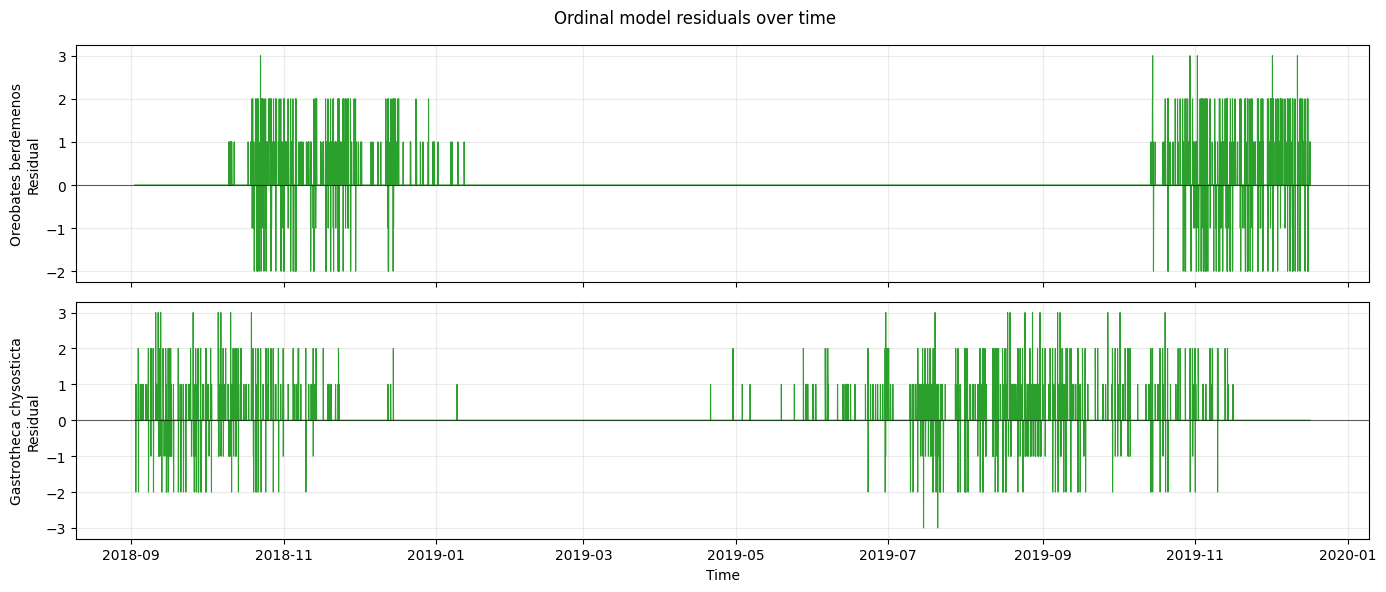

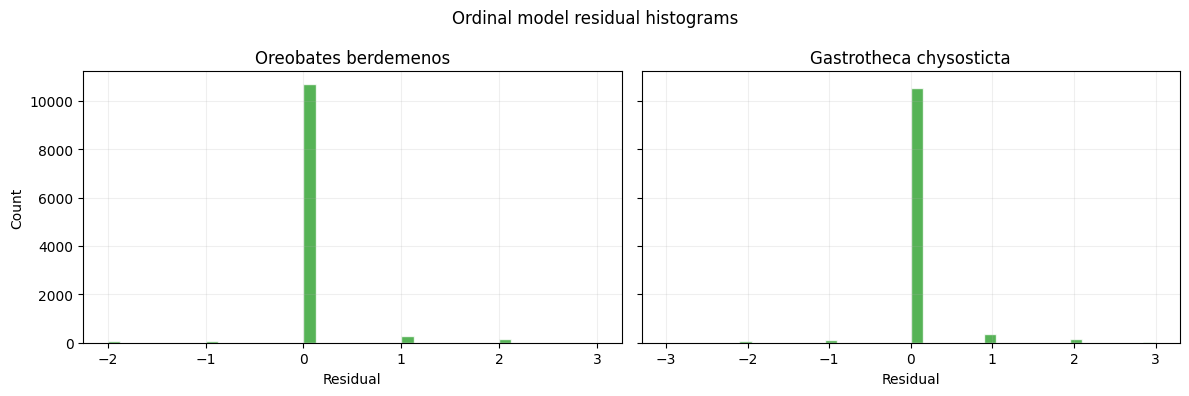

In [14]:
# Residual plots for previous models:
# - VAR (from fitted vs actual in cell 14)
# - Ordinal (from ordinal_predictions in cells 15/16)

# --- VAR residuals ---
assert 'fitted' in globals() and 'actual' in globals(), "Run the VAR plotting cell to create 'fitted' and 'actual'."
assert 'cols' in globals(), "Species list 'cols' not found."

# Align and compute residuals
common_idx_var = fitted.index.intersection(actual.index)
resid_var = (actual.loc[common_idx_var, cols] - fitted.loc[common_idx_var, cols])

# Time-series residuals (VAR)
fig1, axes1 = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
for ax, species in zip(axes1, cols):
    ax.plot(resid_var.index, resid_var[species], color='tab:blue', linewidth=0.8)
    ax.axhline(0, color='black', linewidth=0.8, alpha=0.6)
    ax.set_ylabel(f'{species}\nResidual')
    ax.grid(alpha=0.25)
axes1[-1].set_xlabel('Time')
plt.suptitle('VAR residuals over time')
plt.tight_layout()
plt.show()

# Histogram of residuals (VAR)
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, species in zip(axes2, cols):
    ax.hist(resid_var[species].dropna(), bins=40, color='tab:blue', alpha=0.8, edgecolor='white')
    ax.set_title(species)
    ax.set_xlabel('Residual')
    ax.grid(alpha=0.2)
axes2[0].set_ylabel('Count')
plt.suptitle('VAR residual histograms')
plt.tight_layout()
plt.show()

# --- Ordinal residuals (uses the latest ordinal_predictions DataFrame) ---
assert 'ordinal_predictions' in globals(), "Run an ordinal plotting cell to create 'ordinal_predictions'."

# Expect predicted columns named "{species}_pred"
missing_pred = [s for s in cols if f"{s}_pred" not in ordinal_predictions.columns]
assert not missing_pred, f"Missing predicted columns for: {missing_pred}"

# Compute residuals: actual - predicted
resid_ord = {}
for species in cols:
    resid_ord[species] = ordinal_predictions[species] - ordinal_predictions[f"{species}_pred"]
resid_ord = pd.DataFrame(resid_ord, index=ordinal_predictions.index)

# Time-series residuals (Ordinal)
fig3, axes3 = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
for ax, species in zip(axes3, cols):
    ax.plot(resid_ord.index, resid_ord[species], color='tab:green', linewidth=0.8)
    ax.axhline(0, color='black', linewidth=0.8, alpha=0.6)
    ax.set_ylabel(f'{species}\nResidual')
    ax.grid(alpha=0.25)
axes3[-1].set_xlabel('Time')
plt.suptitle('Ordinal model residuals over time')
plt.tight_layout()
plt.show()

# Histogram of residuals (Ordinal)
fig4, axes4 = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, species in zip(axes4, cols):
    ax.hist(resid_ord[species].dropna(), bins=40, color='tab:green', alpha=0.8, edgecolor='white')
    ax.set_title(species)
    ax.set_xlabel('Residual')
    ax.grid(alpha=0.2)
axes4[0].set_ylabel('Count')
plt.suptitle('Ordinal model residual histograms')
plt.tight_layout()
plt.show()